In [1]:
# the necessary import statements!

# to paralelize and accelerate the calculations
import numba as nb
from numba import jit
from numba import njit


import joblib
from joblib import Parallel, delayed
import multiprocessing


# numpy for fast calculations using arrays
import numpy as np

# scipy for minimization
import scipy
from scipy import optimize
from scipy.optimize import minimize as spmin
from scipy.optimize import Bounds

# some trigonometric functions
from math import pi, sin, cos, sqrt
import math

# to plot graphics
import matplotlib.pyplot as plt
%matplotlib inline

# the time of some calculations
import timeit

import dlib

import random

from tqdm import tnrange, tqdm_notebook

In [1763]:
#import pandas_profiling
print(1.29/1.42)

0.9084507042253522


In [1962]:
# parameters of the simulation
"""
Msat=float(1000/(4*pi))
Ms=float(1/Msat)

#K1=float(((1*1.00)*10**4))
K1=float(((-0*6.00)*10**4))
K2=float((-0*0.05*10**5))
Kuni=float((0*0.6*10**4))
Kuni2=float((0*0.5*10**4))
K1mel=float((0*0.5*10**4))
K1out=float((0*2.0*10**4))
Knucl=float((0*1.0*10**4))

# EB parameters!
#Kf1=float(((1*4.000)*10**2))
Kf1=float(((-0*1.000)*10**3))
Kf1_bi=float(((1*10.000)*10**3))
Kf2_bi=float(((-1*5.000)*10**3))
#Kf1_gal=float(((1*3.000)*10**3))
Kf1_gal=float(((-1*3.500)*10**3))
Kf2_gal=float(((1*1.000)*10**3))
Krot_gal=float(((0*1.5000)*10**3))
Kf1_bi_gal=float(((1*5.000)*10**3))

gal_deg = 40*pi/180

tf=10.*10**-9
Jeff_EB=float(((0*0.0010/tf)*10**-3))/(Msat**2)
#Jeff_EB=float(((0*0.000010/tf)*10**-3))/(Msat**2)
Jeff_C=float(((0*0.003/tf)*10**-3))/(Msat**2)
Jeff_C_quad=float(((0*0.0005/tf)*10**-3))/(Msat**2)

gamma_f = 0*3.1415/4.-6*pi/180.
phi_eb = 1*3.1415/180.
theta_eb = 3.1415/2.+1*pi/180.
thetarma = 3.1415/2.+1*pi/180.
tau_avg = 300*10**-6
tempo = 1*500*tau_avg

Neff=float(1.00*1.000)
#field-dependent anisotropy
Kfd=float(-0*0.30*10**0)
#Krot=float((1*2.50*10**4))
Krot=float((-0*1.65*10**4))
Krot2=float((-0*1.80*10**3))
htheta=float(+2*pi/4.+1.00*pi/180.)
hphi=float(0*pi/4+5.00*pi/180.)

# Nanoparticle arrangement order
# 1-> square
# 2-> ring
# 3-> nanomembrane
np_order = 1


Nparticles=30

height=1

NN=Nparticles**3
NN2=Nparticles**2

#NN2=2

# interaction strengths!

m = -0*0.8

beta = 0*0.03

jota = -0*0.004

jotabi = -0*0.04

# campo termico

field_temp = 2*0.0000008
field_temp = 4*0.0000008

"""



Msat=float(1400)
Ms=float(1/Msat)

#K1=float(((1*1.00)*10**4))
K1=float(((-0*6.00)*10**4))
K2=float((-0*0.05*10**5))
Kuni=float((0*0.6*10**4))
Kuni2=float((0*0.5*10**4))
K1mel=float((0*0.5*10**4))
K1out=float((0*2.0*10**4))
Knucl=float((0*1.0*10**4))

# EB parameters!
#Kf1=float(((-1.30*3.920)*10**4))
#Kf1=float(((-1.42*3.920)*10**4))
Kf1=float(((-1.29*3.920)*10**4))
Kf1_bi=float(((0*10.000)*10**3))
Kf2_bi=float(((-0*5.000)*10**3))
#Kf1_gal=float(((1*3.000)*10**3))
Kf1_gal=float(((-0*3.500)*10**3))
Kf2_gal=float(((0*1.000)*10**3))
Krot_gal=float(((0*1.5000)*10**3))
Kf1_bi_gal=float(((0*5.000)*10**3))

# ucs spins
Kf1_ucs=float(((-1*9.000)*10**6))
#Kf1_ucs=float(((-1*1.300)*10**7))
m_ucs=float(0*900/10.)
tt=0.5*10**-6
#J_ucs=float(((1.24*1.12/tt)*10**-1))/(Msat**2)
J_ucs=float(((1.255*1.12/tt)*10**-1))/(Msat**2)
J_ucs=float(((0.98*1.12/tt)*10**-1))/(Msat**2)

# rotatable spins!

#Kf1_rot=float(((-1*5.270)*10**5))
Kf1_rot=float(((-1.5*5.270)*10**5))
m_rot=float(0*900/10.)
tt=0.5*10**-6
J_rot=float(((1*2.83/tt)*10**-2))/(Msat**2)
#J_rot=float(((1.05*2.83/tt)*10**-2))/(Msat**2)

gal_deg = 40*pi/180

tf=10.*10**-9
#Jeff_EB=float(((1*0.0065/tf)*10**-1))/(Msat**2)
Jeff_EB=float(((0*0.0065/tf)*10**-1))/(Msat**2)
Jeff_C=float(((0*0.003/tf)*10**-3))/(Msat**2)
Jeff_C_quad=float(((0*0.0005/tf)*10**-3))/(Msat**2)

gamma_f = 0*3.1415/4.-0*pi/180.
phi_eb = 1*3.1415/180.
theta_eb = 3.1415/2.+1*pi/180.
thetarma = 3.1415/2.+1*pi/180.
tau_avg = 300*10**-6
tempo = 1*500*tau_avg

Neff=float(0.00*1.000)
#field-dependent anisotropy
Kfd=float(-0*0.30*10**0)
#Krot=float((1*2.50*10**4))
Krot=float((-0*1.65*10**4))
Krot2=float((-0*1.80*10**3))
htheta=float(+2*pi/4.+1.00*pi/180.)
hphi=float(0*pi/4+5.00*pi/180.)

# Nanoparticle arrangement order
# 1-> square
# 2-> ring
# 3-> nanomembrane
np_order = 1


Nparticles=45

height=1

NN=Nparticles**3
NN2=Nparticles**2

#NN2=2

# interaction strengths!

m = -0*0.05

beta = 0*0.0025

jota = -0*0.002

jotabi = -0*0.002

# campo termico

field_temp = 0*0.0000008
field_temp = 0.0*10**-10



In [2028]:
# applied field parameters

hini=-350.000*1
hfinal=-50.000*1
step=500*1
stepmag=0.15/step
stepmag=0.00/step
hpasso=(hfinal-hini)/step
print(K1,K2,Krot,Msat,step)

0.0 0.0 0.0 1400.0 500


In [2029]:
hpasso

0.6

In [2030]:
Jeff_EB/(Kf1/Msat**2),Jeff_C/(Kf1/Msat**2),jota/(Kf1/Msat**2),m/(Kf1/Msat**2)

(-0.0, -0.0, -0.0, -0.0)

In [2031]:
J_ucs/(Kf1/Msat**2)

-4.341085271317831

In [2032]:
field_temp*Msat**2

0.0

In [2033]:
2*Kf1/Msat

-72.24

In [2034]:
Jeff_EB*Msat

0.0

In [2035]:
beta/(Kf1/Msat**2),jotabi/(Kf1/Msat**2)

(-0.0, -0.0)

In [2036]:
#m/(Kf1_bi/Msat**2)

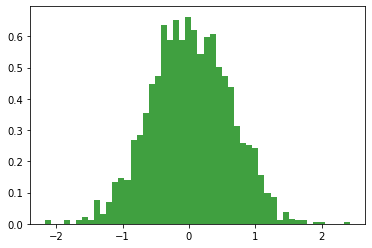

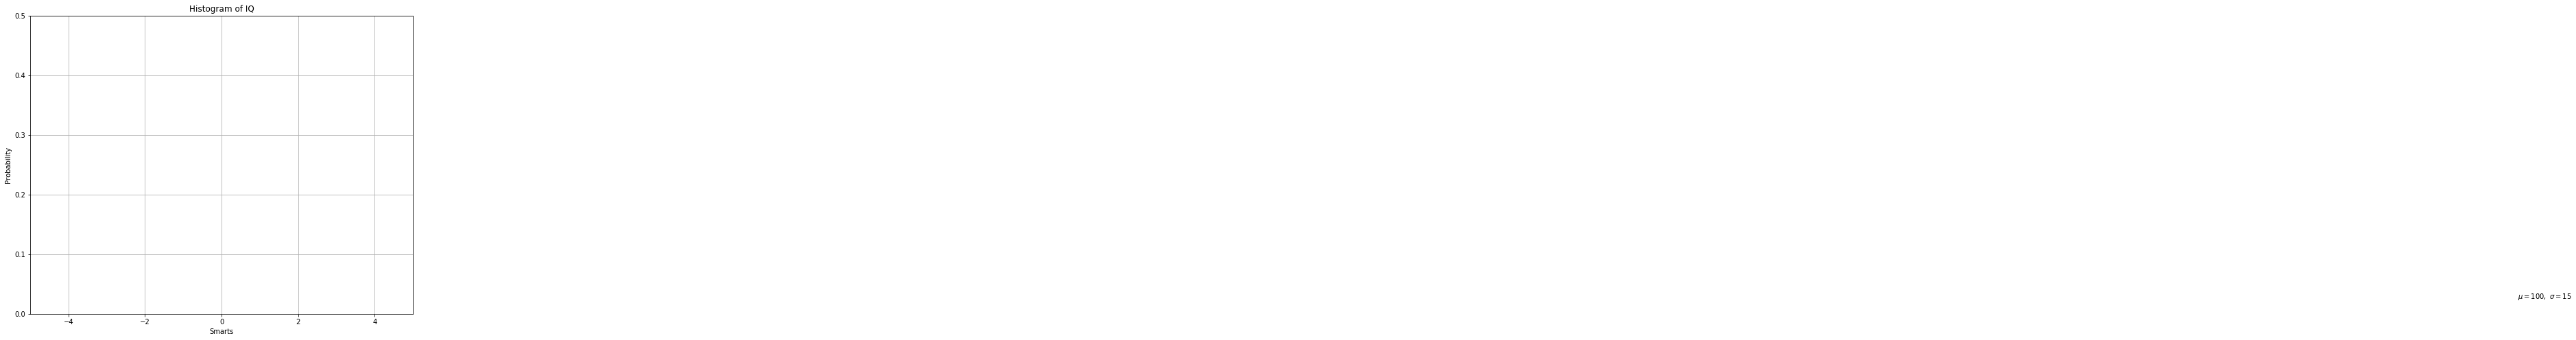

In [2037]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 0, 0.6
x = mu + sigma * np.random.randn(NN2)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.figure(figsize=[10,8])
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(-5, 5)
plt.ylim(0, 0.5)
plt.grid(True)
plt.show()

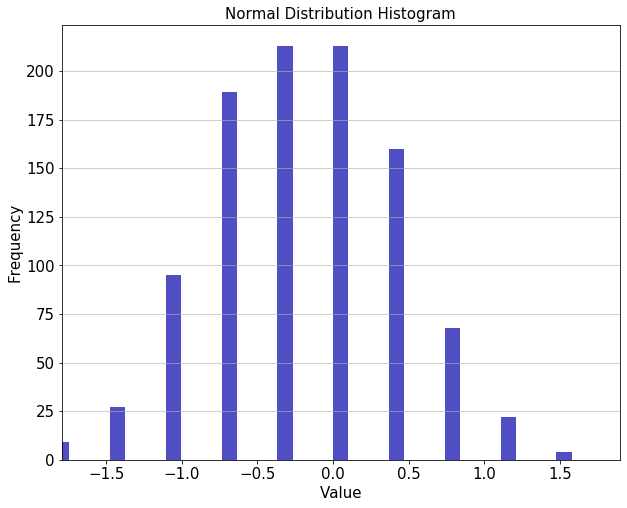

In [2038]:
NN2
rand_gauss=np.random.normal(0,0.6,1000)
hist,bin_edges = np.histogram(rand_gauss)
#print(rand_gauss)
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])

plt.bar(bin_edges[:-1], hist, width = 0.1, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

In [2039]:
bin_edges

array([-1.79378398, -1.42467215, -1.05556033, -0.6864485 , -0.31733667,
        0.05177516,  0.42088699,  0.78999882,  1.15911065,  1.52822248,
        1.89733431])

In [2040]:
# array for angle dispersion in 'phi' and 'theta'

#phi_np = np.array([0*pi/1.*random.random() for x in range(NN2)],dtype=np.float64)
#phi_np = np.array([1.*np.random.normal(0,10*pi/180) for x in range(NN2)],dtype=np.float64)

#phi_np = np.array([1.*np.random.normal(0,35*pi/180) for x in range(NN2)],dtype=np.float64)

#phi_np = np.array([1.*np.random.normal(0,25*pi/180) for x in range(NN2)],dtype=np.float64)
#phi_np=np.array([1.*np.random.normal(0,20*pi/180) if(x<NN2*5/10.) else 1.*np.random.normal(pi/1.,20*pi/180) for x in range(NN2)],dtype=np.float64)

phi_np = np.array([1.*np.random.normal(0,18*pi/180) for x in range(NN2)],dtype=np.float64)
phi_np = np.array([1.*np.random.normal(0,20*pi/180) for x in range(NN2)],dtype=np.float64)

theta_np = np.array([0*random.random() for x in range(NN2)],dtype=np.float64)
#print(phi_np)


In [2041]:
#phi_ucs_deg= np.array([1*pi/16.*random.random() for x in range(NN2)],dtype=np.float64)

#phi_ucs_deg= np.array([1.*np.random.normal(0,8*pi/180) for x in range(NN2)],dtype=np.float64)
#phi_ucs_deg=np.array([1.*np.random.normal(0,5*pi/180) if(x<NN2/2.) else 1.*np.random.normal(pi/2.,5*pi/180) for x in range(NN2)],dtype=np.float64)
phi_ucs_deg= np.array([1.*np.random.normal(0,8*pi/180) for x in range(NN2)],dtype=np.float64)

phi_ucs_deg= np.array([1.*np.random.normal(0,10*pi/180) for x in range(NN2)],dtype=np.float64)



In [2042]:
phi_ucs_deg

array([ 0.12273973,  0.22577321, -0.21077721, ..., -0.28095224,
       -0.03987599,  0.24114507])

In [2043]:
#phi_rot_deg= np.array([2*pi/1.*random.random() for x in range(NN2)],dtype=np.float64)

#phi_rot_deg= np.array([1.*np.random.normal(0,15*pi/180) for x in range(NN2)],dtype=np.float64)
#phi_rot_deg= np.array([1.*np.random.normal(0,5*pi/180) if(x<NN2*4/5.) else 1.*np.random.normal(pi/2.,5*pi/180) for x in range(NN2)],dtype=np.float64)
phi_rot_deg= np.array([1.*np.random.normal(0.,2*pi/180)  for x in range(NN2)],dtype=np.float64)




In [2044]:
phi_np

array([-0.1673885 ,  0.33959071, -0.26103177, ...,  0.38649434,
        0.01758738,  0.43505887])

(array([  2.,   0.,   2.,   0.,   5.,   3.,   7.,   8.,  10.,  17.,  20.,
         31.,  29.,  30.,  44.,  57.,  62.,  60.,  94.,  73.,  80.,  96.,
         87., 118.,  95., 102., 101.,  90.,  98.,  95.,  93.,  74.,  57.,
         51.,  43.,  45.,  30.,  26.,  20.,  13.,  12.,  13.,  16.,   5.,
          5.,   5.,   0.,   0.,   0.,   1.]),
 array([-0.56865417, -0.54594514, -0.52323612, -0.50052709, -0.47781807,
        -0.45510904, -0.43240001, -0.40969099, -0.38698196, -0.36427294,
        -0.34156391, -0.31885489, -0.29614586, -0.27343684, -0.25072781,
        -0.22801878, -0.20530976, -0.18260073, -0.15989171, -0.13718268,
        -0.11447366, -0.09176463, -0.0690556 , -0.04634658, -0.02363755,
        -0.00092853,  0.0217805 ,  0.04448952,  0.06719855,  0.08990757,
         0.1126166 ,  0.13532563,  0.15803465,  0.18074368,  0.2034527 ,
         0.22616173,  0.24887075,  0.27157978,  0.29428881,  0.31699783,
         0.33970686,  0.36241588,  0.38512491,  0.40783393,  0.43054296,
 

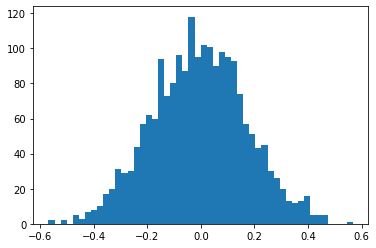

In [2045]:
plt.hist(phi_ucs_deg,50)

(array([  3.,   5.,   6.,  13.,  14.,  26.,  49.,  81., 105., 153., 174.,
        184., 217., 191., 204., 174., 131., 112.,  63.,  53.,  30.,  15.,
         10.,   8.,   4.]),
 array([-1.14939993, -1.06088439, -0.97236886, -0.88385332, -0.79533779,
        -0.70682225, -0.61830672, -0.52979118, -0.44127564, -0.35276011,
        -0.26424457, -0.17572904, -0.0872135 ,  0.00130203,  0.08981757,
         0.17833311,  0.26684864,  0.35536418,  0.44387971,  0.53239525,
         0.62091078,  0.70942632,  0.79794186,  0.88645739,  0.97497293,
         1.06348846]),
 <a list of 25 Patch objects>)

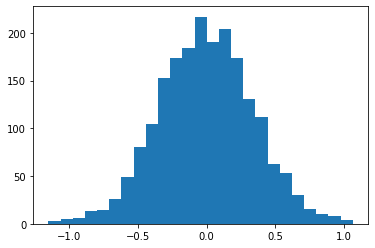

In [2046]:
plt.hist(phi_np,25)

(array([  1.,   0.,   1.,   0.,   1.,   8.,   1.,   1.,   8.,  14.,  13.,
         25.,  29.,  32.,  31.,  52.,  62.,  57.,  70.,  85.,  89., 100.,
        122., 130., 114., 121., 115., 100., 103.,  93.,  96.,  63.,  60.,
         42.,  43.,  31.,  28.,  20.,  19.,  12.,   9.,   5.,   3.,   7.,
          5.,   0.,   2.,   0.,   0.,   2.]),
 array([-0.12384107, -0.11886513, -0.1138892 , -0.10891326, -0.10393733,
        -0.09896139, -0.09398546, -0.08900952, -0.08403359, -0.07905765,
        -0.07408172, -0.06910578, -0.06412985, -0.05915391, -0.05417797,
        -0.04920204, -0.0442261 , -0.03925017, -0.03427423, -0.0292983 ,
        -0.02432236, -0.01934643, -0.01437049, -0.00939456, -0.00441862,
         0.00055731,  0.00553325,  0.01050918,  0.01548512,  0.02046106,
         0.02543699,  0.03041293,  0.03538886,  0.0403648 ,  0.04534073,
         0.05031667,  0.0552926 ,  0.06026854,  0.06524447,  0.07022041,
         0.07519634,  0.08017228,  0.08514822,  0.09012415,  0.09510009,
 

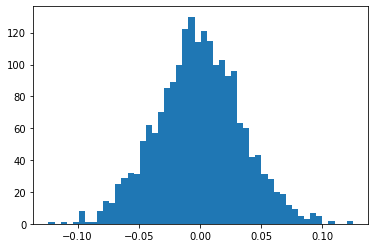

In [2047]:
plt.hist(phi_rot_deg,50)

In [2048]:
# the function that defines the common magnetic anisotropy terms
#@jit(nopython=True)
#def anisotropy(phi,theta,K1,K2,h,htheta,hphi,Msat,i):
@jit(nopython=True,parallel=True)
def anisotropy(phi,phi_ucs,phi_rot,K1,K2,h,htheta,hphi,Msat,i,phiantarray,thetaantarray,phi_np):

    phiant=phiantarray[i]
    thetaant=thetaantarray[i]

#    anis+=Kuni/(Msat**2)*np.sin(phi-3.1415/4.)**2*np.sin(theta-3.1415/4.)**2
#    anis=Kuni/(Msat**2)*np.sin(phi-3.1415/4.)**2*np.sin(theta-0.94)**2

#    anis=Kuni/(Msat**2)*np.cos(phi-3.1415/4.)**2*np.sin(phi-3.1415/4.)**2*np.sin(theta)**2
#    anis=Kuni/(Msat**2)*(np.sin(phi-phi_np[i])**2*np.cos(phi-phi_np[i])**2*np.sin(theta-theta_np[i])**4+np.sin(phi-phi_np[i])**2*np.sin(theta-theta_np[i])**2*np.cos(theta-theta_np[i])**2+np.cos(phi-phi_np[i])**2*np.sin(theta-theta_np[i])**2*np.cos(theta-theta_np[i])**2)
#    anis=Kuni/(Msat**2)*(np.sin(phi-phi_np[i])**2*np.cos(phi-phi_np[i])**2*np.sin(theta-theta_np[i])**4)
    
#    theta=theta+0.97
#    phi=phi-3.1415/4.

    
# first-order cubic magnetocrystalline anisotropy
#    anis=K1/(Msat**2)*(np.sin(phi-3.14/4.)**2*np.cos(phi-3.14/4.)**2*np.sin(theta-0.94)**4+np.sin(phi-3.14/4.)**2*np.sin(theta-0.94)**2*np.cos(theta-0.94)**2+np.cos(phi-3.14/4.)**2*np.sin(theta-0.94)**2*np.cos(theta-0.94)**2)
#    anis=K1/(Msat**2)*(np.sin(phi-3.14/4.)**2*np.cos(phi-3.14/4.)**2*np.sin(theta)**4+np.sin(phi-3.14/4.)**2*np.sin(theta)**2*np.cos(theta)**2+np.cos(phi-3.14/4.)**2*np.sin(theta)**2*np.cos(theta)**2)
#    anis+=K1/(Msat**2)*(np.sin(phi-phi_np[i])**2*np.cos(phi-phi_np[i])**2*np.sin(theta-theta_np[i])**4+np.sin(phi-phi_np[i])**2*np.sin(theta-theta_np[i])**2*np.cos(theta-theta_np[i])**2+np.cos(phi-phi_np[i])**2*np.sin(theta-theta_np[i])**2*np.cos(theta-theta_np[i])**2)

# second-order cubic magnetocrystalline anisotropy    
#    anis+=K2/(Msat**2)*np.sin(phi)**2*np.sin(theta)**2*np.cos(phi)**2*np.sin(theta)**2*np.cos(theta)**2

# Eb anisotropy terms!

    anis= (Kf1/(Msat**2))*(np.cos(phi-phi_np[i]+0*pi/180)**2)
#    anis= (Kf1/(Msat**2))*(np.sin(phi-3.89)**2)

    anis+= Kf1_bi/(Msat**2)*np.sin(phi-gamma_f)**2*np.cos(phi-gamma_f)**2
    anis+= Kf1_bi_gal/(Msat**2)*np.sin(phi-pi/4.)**2*np.cos(phi-pi/4.)**2
#    anis+= Kf2_bi/(Msat**2)*np.sin(phi-gamma_f)**4*np.cos(phi-gamma_f)**4

    anis+= Kf1_gal/(Msat**2)*np.cos(phi-gal_deg)**2
    anis+= Kf2_gal/(Msat**2)*np.cos(phi-gal_deg)**4
    anis+=Krot_gal/(Msat**2)*(np.cos(phi-hphi))**2    
    
    anis+=-Jeff_EB*(np.cos(phi-phi_eb))
    
    ### uncompensated spins
    
    anis+= Kf1_ucs/(Msat**2)*np.cos(phi_ucs-phi_ucs_deg[i])**2
    
    ## coupling FM with UCS!
    
    anis+= -J_ucs*np.cos(phi_ucs-phi+0*pi/180)**1
#    anis+= -J_ucs*np.cos(phi-phi_ucs_deg[i])**1
    
    # rotatable!
    
    anis+= Kf1_rot/(Msat**2)*np.cos(phi_rot-phi_rot_deg[i])**2
    anis+= -J_rot*np.cos(phi_rot-phi)**1
#    anis+= -J_rot*np.cos(phi-phi_rot_deg[i])**1

#    print(J_ucs)
    
    # demagnetizing energy
#    anis+=2*3.1415*Neff/(Msat**2)*np.cos(theta)**2

#    anis+=Knucl/(Msat**2)*np.sin(theta-thetaant)*np.cos(phi-phiant)**1
    
#    anis+=K1out/(Msat**2)*np.cos(theta)**2

    
    # magelas anisotropy 
    
#    anis+=K1mel/(Msat**2)*np.cos(phi-phi_np[i])**2*np.sin(theta-theta_np[i])**2
#    anis+=K1mel/(Msat**2)*np.cos(theta)**2
#    anis+=K1mel/(Msat**2)*np.cos(phi-phi_np[i])**2*np.sin(theta-theta_np[i])**2
    
    
# uniaxial anisotropy 
    
    
# uniaxial anisotropy 
    
#    anis+=Kuni2/(Msat**2)*np.sin(phi-3.1415/4.)**4*np.sin(theta-0.94)**4

# field dependent anis!

#    anis+=Kfd/(Msat**2)*h*Msat*(np.sin(htheta)*np.sin(theta)*np.cos(phi-hphi)+np.cos(htheta)*np.cos(theta))
#    anis+=Kfd/(Msat**2)*h*Msat**2*(np.sin(theta)*np.cos(phi-3.1415/4.))**2
    
# rotatable anis!

#    anis+=Krot/(Msat**2)*(h*Msat)**1*(np.sin(htheta)*np.sin(theta)*np.cos(phi-hphi)+np.cos(htheta)*np.cos(theta))**1
#    anis+=Krot/(Msat**2)*(np.sin(htheta)*np.sin(theta-theta_np[i])*np.cos(phi-phi_np[i]-hphi)+np.cos(htheta)*np.cos(theta-theta_np[i]))**2
    

    """
    if(abs(h*Msat)>100):
    
        anis+=0*Krot/(Msat**2)*(np.sin(htheta)*np.sin(theta)*np.cos(phi-hphi)+np.cos(htheta)*np.cos(theta))**2
    else:
        anis+=(100-abs(h*Msat))/100.*Krot/(Msat**2)*(np.sin(htheta)*np.sin(theta)*np.cos(phi-hphi)+np.cos(htheta)*np.cos(theta))**2
    """
    
#    anis+=Krot2/(Msat**2)*(np.sin(htheta)*np.sin(theta)*np.cos(phi-hphi)+np.cos(htheta)*np.cos(theta))**4
    
#    print(Kf1_bi/(Msat**2),anis,gamma_f)
    
    return anis
    

In [2049]:
import random

phiantarray=np.array([random.random() for x in range(NN2*height)],dtype=np.float64)
thetaantarray=np.array([random.random() for x in range(NN2*height)])
rotarray_vai=np.array([random.random() for x in range(NN2*height)])


In [2050]:
h=-1.
anisotropy(3.1415/4.,3.1415/4.,3.1415/4.,K1,K2,h,htheta,hphi,Msat,1,phiantarray,thetaantarray,phi_np)

/home/vagner/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-2048-454e4c99794e>", line 5:
@jit(nopython=True,parallel=True)
def anisotropy(phi,phi_ucs,phi_rot,K1,K2,h,htheta,hphi,Msat,i,phiantarray,thetaantarray,phi_np):
^

  state.func_ir.loc))


-3.6697092703253724

In [2051]:
np.random.normal(0,0.6)

-0.5613289352398545

In [2052]:
# Zeeman Energy

#@jit(nopython=True)
@jit(nopython=True,parallel=True)
def zeeman_energy(phi,phi_ucs,phi_rot,K1,K2,h,htheta,hphi,Msat,i):
    
#    print(h,field_temp*np.random.normal(0,0.6))
    h=h+field_temp*np.random.normal(0,0.6)
#    print(h)
    zeeman=-h*(np.cos(phi-hphi))-h*m_ucs/Msat*(np.cos(phi_ucs-hphi))-h*m_rot/Msat*(np.cos(phi_rot-hphi))
#    zeeman=-(h+field_temp*np.random.normal(0,0.6))*(np.cos(phi-hphi))

#    print(h,field_temp*np.random.normal(0,0.6))

    return zeeman


In [2053]:
zeeman_energy(0.,0.,0.,K1,K2,h,htheta,hphi,Msat,0)

/home/vagner/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-2052-1a48dbde1c22>", line 5:
@jit(nopython=True,parallel=True)
def zeeman_energy(phi,phi_ucs,phi_rot,K1,K2,h,htheta,hphi,Msat,i):
^

  state.func_ir.loc))


0.9961946980917455

In [2054]:
# creating positions!
# this is for creating positions!

#@jit(nopython=True,parallel=True)
#@jit(nopython=True)
def create_pos(np_order,NN2):
    
    if(np_order==1):
        
        nnx=int(sqrt(NN2))
        nny=int(sqrt(NN2))
        
        coord_pos = []
#        coord_pos = np.zeros((nnx,nny,nnx))
#        coord_pos = np.zeros(NN2)
        
        for i in range(nnx):

            for j in range(nnx):
                
#                coord_pos.append([i,j,0])
                coord_pos.append([1*i,1*j,0])
#                coord_pos = np.append(coord_pos,[1*i,1*j,0])

#                coord_pos[i][j][0] = np.array([1*i,1*j,0])
    
    elif(np_order==2):
        
        coord_pos=[]
        
        for i in range(NN2):
            
            coord_pos.append([NN2*math.cos(2*pi*i/NN2),NN2*math.sin(2*pi*i/NN2),0])
    
    elif(np_order==3):
        
        coord_pos=[]
        
        for j in range(height):
        
            for i in range(NN2):

                coord_pos.append([NN2*math.cos(2*pi*i/NN2),j,NN2*math.sin(2*pi*i/NN2)])

    return np.array(coord_pos,dtype=np.float64)


In [2055]:
# this is to create the angles, which are used in the computation of the interactions!

ar_pos=create_pos(np_order,NN2)


#@jit(nopython=True,parallel=True)
@jit(nopython=True)
def angles_vecs(NN2):

    print(np_order)
#    ar_pos=create_pos(np_order,NN2)

#    print(ar_pos)
    
    x_coord = [ar_pos[i][0] for i in range(NN2*height)]
    y_coord = [ar_pos[i][1] for i in range(NN2*height)]
    z_coord = [ar_pos[i][2] for i in range(NN2*height)]

    x_ang = []
    y_ang = []
    
    for i in range(NN2*height):
        x_ang_menor=[]
        y_ang_menor=[]
        
        for j in range(NN2*height):
            
            if(i!=j):
                innerproduct = x_coord[i]*x_coord[j]+y_coord[i]*y_coord[j]

                dist1 = sqrt(x_coord[i]**2+y_coord[i]**2+z_coord[i]**2)
                dist2 = sqrt(x_coord[j]**2+y_coord[j]**2+z_coord[j]**2)
                
                distnewvec = sqrt((x_coord[j]-x_coord[i])**2+(y_coord[j]-y_coord[i])**2+(z_coord[j]-z_coord[i])**2)
                distnewvecplane = sqrt((x_coord[j]-x_coord[i])**2+(y_coord[j]-y_coord[i])**2)
                
                if(distnewvecplane!=0.0):
#                    angphi = math.acos((x_coord[j]-x_coord[i])/distnewvecplane)
#                    angtheta = math.acos((z_coord[j]-z_coord[i])/distnewvec)
                    angphi = math.acos((x_coord[i]-x_coord[j])/distnewvecplane)
                    angtheta = math.acos((z_coord[i]-z_coord[j])/distnewvec)
                elif(distnewvecplane == 0.0):
                    angphi = 0.0
                    angtheta = 3.1415/2.
                x_ang_menor.append(angphi)
                y_ang_menor.append(angtheta)
                
            elif(i==j):
                
                x_ang_menor.append(0.0)
                y_ang_menor.append(0.0)
                
        x_ang.append(x_ang_menor)
        y_ang.append(y_ang_menor)
        x_ang_menor=[]
        y_ang_menor=[]
                

                
#    return np.array(x_ang,dtype=np.float64),np.array(y_ang,np.float64)
#    return np.array(x_ang),np.array(y_ang)
    return x_ang,y_ang

In [2056]:
# Function to calculate the distance between particles 'i' and 'j'

#@jit(nopython=True)
def dist_dipolar(i,j):
    sizex=int(sqrt(NN2))
    sizey=int(sqrt(NN2))
    
    # distance of particle 'j' from particle 'i'
#    distdip=[]
    '''
    for ii in range(sizex):
        for jj in range(sizey):
            distdip.append(sqrt((int(i/sizex)-ii)**2+(int(i%sizey)-jj)**2))
    '''
    
    '''
    distdip=sqrt((int(i/sizex)-int(j/sizex))**2+(int(i%sizey)-int(j%sizey))**2)
    '''

    if(np_order==1):

        distdip=[]
        for ii in range(NN2):
            distdip1=[]
            for jj in range(NN2):
                distdip1.append(sqrt((int(ii/sizex)-int(jj/sizex))**2+(int(ii%sizey)-int(jj%sizey))**2))
            distdip.append(distdip1)
            
    elif(np_order==2):
        
        distdip=[]
#        distdip=np.empty(NN2)
        for ii in range(NN2):
            distmin=[]
            distdip1=[]
            for jj in range(NN2):
                distdip1.append(sqrt((math.cos(2*pi*ii/NN2)-math.cos(2*pi*jj/NN2))**2+(math.sin(2*pi*ii/NN2)-math.sin(2*pi*jj/NN2))**2))
            
                if(ii!=jj):
                    distmin.append(sqrt((math.cos(2*pi*ii/NN2)-math.cos(2*pi*jj/NN2))**2+(math.sin(2*pi*ii/NN2)-math.sin(2*pi*jj/NN2))**2))

            arraydistmin=np.array(distmin)
            
            distdip1new=[]
            
            for u in range(NN2):
                distdip1new.append(distdip1[u]/np.amin(arraydistmin))
            
            distdip.append(distdip1new)
#            distdip1=np.array(distdip1)
#            distmin=np.array(distmin)
#            distdip[ii]=distdip1/np.amin(distmin)
#            distdip=np.array(distdip)


    elif(np_order==3):
        
        distdip=[]
#        distdip=np.empty(NN2)
        for ii in range(NN2*height):
            distmin=[]
            distdip1=[]
            for jj in range(NN2*height):
#                for kkk in range(height):
#                    for kk in range(height):
           
                distdip1.append(sqrt((math.cos(2*pi*(ii%NN2)/NN2)-math.cos(2*pi*(jj%NN2)/NN2))**2+(math.sin(2*pi*(ii%NN2)/NN2)-math.sin(2*pi*(jj%NN2)/NN2))**2+((int(ii/NN2)-int(jj/NN2))/height)**2))

                if(ii!=jj):
                
                    distmin.append(sqrt((math.cos(2*pi*(ii%NN2)/NN2)-math.cos(2*pi*(jj%NN2)/NN2))**2+(math.sin(2*pi*(ii%NN2)/NN2)-math.sin(2*pi*(jj%NN2)/NN2))**2+((int(ii/NN2)-int(jj/NN2))/height)**2))

            arraydistmin=np.array(distmin)

            distdip1new=[]
            if(np.amin(arraydistmin)==0.0):
                print(ii,'ii')
                print(distdip1[1])
                print('zerou',np.argmin(arraydistmin),arraydistmin[np.argmin(arraydistmin)-1])
                break

            for u in range(NN2*height):
                distdip1new.append(distdip1[u]/np.amin(arraydistmin))

            distdip.append(distdip1new)



#        distdip=[]
        
#    return np.array(distdip,dtype=np.float64)
#    return distdip[j]
    return distdip


In [2057]:
ii=20
jj=30
print(len(dist_dipolar(2,3)))
#dist_dipolar(20,30)[14][25]




2025


In [2058]:
vec_dip=np.array(dist_dipolar(20,30))

In [2059]:
x_ang,y_ang = angles_vecs(NN2)
#rr=dist_dipolar(i)
x_ang=np.array(x_ang,dtype=np.float64)
y_ang=np.array(y_ang,dtype=np.float64)

1


In [2060]:
len(x_ang[1])


2025

In [2061]:
y_ang[1]

array([1.57079633, 0.        , 1.57079633, ..., 1.57079633, 1.57079633,
       1.57079633])

In [2062]:
# the interactions
#vec_dip_called = np.array(vec_dip)

#@jit(nopython=True)
@jit(nopython=True,parallel=True,fastmath=True)
def energy_interdipolar(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j):

    #obtaining the angles to calculate the interactions!

#    print(i,'i before')
#    print(j,'j before')
    
#    x_ang,y_ang = angles_vecs(NN2)
#    print(i,'i')
#    print(j,'j')
#    print(phiantarray)
    phiant = phiantarray[j]
    thetaant = pi/2.
# dipolar energy

#    phiant=phi+phiantarray[j]-phiantarray[i]
#    thetaant=theta+thetaantarray[j]-thetaantarray[i]

#    print(beta,'beta')
    theta=pi/2.
    rr=vec_dip[i][j]
#    rr=vec_dip_called[i][j]

#    create_pos(np_order,NN2)
    inter_dipolar=-3*beta/(rr**3)*(np.sin(theta)*np.sin(y_ang[i][j])*np.cos(phi-x_ang[i][j])+np.cos(theta)*np.cos(y_ang[i][j]))*(np.sin(thetaant)*np.sin(y_ang[i][j])*np.cos(phiant-x_ang[i][j])+np.cos(thetaant)*np.cos(y_ang[i][j]));
    inter_dipolar+=beta/(rr**3)*(np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant))

#    print(inter_dipolar,'dipolar')
    
    return inter_dipolar
    
# exchange energy

# moriya energy



In [2063]:
energy_interdipolar(0.2,phiantarray,thetaantarray,K1,K2,0.3,htheta,hphi,0,1)

/home/vagner/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-2062-7c335a5f0921>", line 6:
@jit(nopython=True,parallel=True,fastmath=True)
def energy_interdipolar(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j):
^

  state.func_ir.loc))


0.0

In [2064]:
@jit(nopython=True,parallel=True,fastmath=True)
def energy_interexchange(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j,jota):
    #obtaining the angles to calculate the interactions!

#    print(i,'i before')
#    print(j,'j before')
    
#    x_ang,y_ang = angles_vecs(NN2)
#    print(i,'i')
#    print(j,'j')
#    print(phiantarray)
    phiant = phiantarray[j]
    thetaant = pi/2.
# dipolar energy

#    phiant=phi+phiantarray[j]-phiantarray[i]
#    thetaant=theta+thetaantarray[j]-thetaantarray[i]

#    print(beta,'beta')

    rr=vec_dip[i][j]
#    rr=vec_dip_called[i][j]
    theta=pi/2.
#    create_pos(np_order,NN2)
    inter_exc=jota*np.exp(-rr**9)/np.exp(-1.0)*(np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant))
#    print(jota*np.exp(-rr)/np.exp(-1.0))
#    print((np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant)))

#    print(inter_dipolar,'dipolar')
    
    return inter_exc


In [2065]:
@jit(nopython=True,parallel=True,fastmath=True)
def energy_interexchange_eb(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j):
    #obtaining the angles to calculate the interactions!

#    print(i,'i before')
#    print(j,'j before')
    
#    x_ang,y_ang = angles_vecs(NN2)
#    print(i,'i')
#    print(j,'j')
#    print(phiantarray)
    phiant = phiantarray[j]
    thetaant = pi/2.
# dipolar energy

#    phiant=phi+phiantarray[j]-phiantarray[i]
#    thetaant=theta+thetaantarray[j]-thetaantarray[i]

#    print(beta,'beta')

    rr=vec_dip[i][j]
#    rr=vec_dip_called[i][j]
    theta=pi/2.
#    create_pos(np_order,NN2)
#    inter_exc= -Jeff_EB*np.exp(-rr**9)/np.exp(-1.0)*(np.sin(theta)*np.sin(theta_eb)*np.cos(phi-phi_eb)+np.cos(theta)*np.cos(theta_eb))
#    inter_exc= -Jeff_EB*(np.sin(theta)*np.sin(theta_eb)*np.cos(phi-phi_eb)+np.cos(theta)*np.cos(theta_eb))
    inter_exc= -0*Jeff_EB*(np.sin(theta)*np.sin(theta_eb)*np.cos(phi-phi_eb)+np.cos(theta)*np.cos(theta_eb))
#    print(jota*np.exp(-rr)/np.exp(-1.0))
#    print((np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant)))

#    print(inter_dipolar,'dipolar')
    
    return inter_exc


In [2066]:
phi_eb

/home/vagner/anaconda3/lib/python3.6/site-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


0.01745277777777778

In [2067]:
@jit(nopython=True,parallel=True,fastmath=True)
def energy_interexchange_rma(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j):
    #obtaining the angles to calculate the interactions!

#    print(i,'i before')
#    print(j,'j before')
    
#    x_ang,y_ang = angles_vecs(NN2)
#    print(i,'i')
#    print(j,'j')
#    print(phiantarray)
    phiant = phiantarray[j]
    thetaant = pi/2.
# dipolar energy

#    phiant=phi+phiantarray[j]-phiantarray[i]
#    thetaant=theta+thetaantarray[j]-thetaantarray[i]

#    print(beta,'beta')

    rr=vec_dip[i][j]
#    rr=vec_dip_called[i][j]

#    create_pos(np_order,NN2)
#    theta_rma = theta*(tempo-tau_avg)
    thetarma = 3.1415/2.
    theta = 3.1415/2.
#    theta_rma = theta
#    phi_rma=phi*(tempo-tau_avg)
    arg=phi-phi*(tempo-tau_avg)
    inter_exc = -Jeff_C*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(arg))
    inter_exc += -Jeff_C_quad*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phi-phi*(tempo-tau_avg)))**2
#    print(jota*np.exp(-rr)/np.exp(-1.0))
#    print((np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant)))

#    print(inter_dipolar,'dipolar')
    
    return inter_exc


In [2068]:
energy_interexchange_rma(pi/2.,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,0,1)

/home/vagner/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-2067-08d8bd3128b4>", line 2:
@jit(nopython=True,parallel=True,fastmath=True)
def energy_interexchange_rma(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j):
^

  state.func_ir.loc))


0.0

In [2069]:
@jit(nopython=True,parallel=True,fastmath=True)
def energy_biinterexchange(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j):
    #obtaining the angles to calculate the interactions!

#    print(i,'i before')
#    print(j,'j before')
    
#    x_ang,y_ang = angles_vecs(NN2)
#    print(i,'i')
#    print(j,'j')
#    print(phiantarray)
    phiant = phiantarray[j]
    thetaant = pi/2.
# dipolar energy

#    phiant=phi+phiantarray[j]-phiantarray[i]
#    thetaant=theta+thetaantarray[j]-thetaantarray[i]

#    print(beta,'beta')

    rr=vec_dip[i][j]
#    rr=vec_dip_called[i][j]
    theta=pi/2.
#    create_pos(np_order,NN2)
    inter_excbi=jotabi*np.exp(-rr**9)/np.exp(-1.0)*(np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant))**2
#    print(jota*np.exp(-rr)/np.exp(-1.0))
#    print((np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant)))

#    print(inter_dipolar,'dipolar')
    
    return inter_excbi


In [2070]:
energy_interexchange_eb(0.0,phiantarray,thetaantarray,K1,K2,0.3,htheta,hphi,4,5)

/home/vagner/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-2065-651a21bf7be8>", line 2:
@jit(nopython=True,parallel=True,fastmath=True)
def energy_interexchange_eb(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j):
^

  state.func_ir.loc))


0.0

In [2071]:
energy_interexchange(0.0,phiantarray,thetaantarray,K1,K2,0.3,htheta,hphi,4,5,jota)

/home/vagner/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-2064-0c9619f77ed2>", line 2:
@jit(nopython=True,parallel=True,fastmath=True)
def energy_interexchange(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j,jota):
^

  state.func_ir.loc))


0.0

In [2072]:
energy_biinterexchange(0.0,phiantarray,thetaantarray,K1,K2,0.3,htheta,hphi,4,5)

/home/vagner/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-2069-5915cb07102c>", line 2:
@jit(nopython=True,parallel=True,fastmath=True)
def energy_biinterexchange(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j):
^

  state.func_ir.loc))


0.0

In [2073]:
# the interactions
#vec_dip_called = np.array(vec_dip)

#@jit(nopython=True)
@jit(nopython=True,parallel=True,fastmath=True)
def energy_moriya(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j):

    #obtaining the angles to calculate the interactions!

#    print(i,'i before')
#    print(j,'j before')
    
#    x_ang,y_ang = angles_vecs(NN2)
#    print(i,'i')
#    print(j,'j')
#    print(phiantarray)
    phiant = phiantarray[j]
    thetaant = thetaantarray[j]
# dipolar energy

#    phiant=phi+phiantarray[j]-phiantarray[i]
#    thetaant=theta+thetaantarray[j]-thetaantarray[i]

#    print(beta,'beta')

    rr=vec_dip[i][j]
#    rr=vec_dip_called[i][j]

#    create_pos(np_order,NN2)

#   vectorial product with k^ versor !
    thetaant=pi/2.
    theta=pi/2.
    

    if(i<=j):
        if(j==i+1):
            ## produto vetorial z^ vec x^ = y^!
#            inter_moriya=m*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta));

#            inter_moriya=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta));
#            inter_moriya+=-m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant));
        
            # biquadratic
            inter_moriya=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta))**2;
            inter_moriya+=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant))**2;
            inter_moriya+=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.sin(thetaant)*np.cos(phiant)*np.sin(theta)*np.sin(phi)-np.sin(theta)*np.cos(phi)*np.sin(thetaant)*np.sin(phiant))**2;
        
            # chiral multi spin
#            inter_moriya=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta))*(np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant));
#            inter_moriya+=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant))*(np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant));
            
        else:
            ## produto vetorial z^ vec y^ = - x^!
#            inter_moriya=-m*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant));

#            inter_moriya=-m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant));
#            inter_moriya+=+m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta));
        
            # biquadratic
            inter_moriya=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant))**2;
            inter_moriya+=+m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta))**2;
            inter_moriya+=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.sin(thetaant)*np.cos(phiant)*np.sin(theta)*np.sin(phi)-np.sin(theta)*np.cos(phi)*np.sin(thetaant)*np.sin(phiant))**2;
        
        
            # chiral multi spin
#            inter_moriya=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta))*(np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant));
#            inter_moriya+=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant))*(np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant));
        
    elif(i>=j):
        if(j==i-1):
#            inter_moriya=-m*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta));

#            inter_moriya=-m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta));
#            inter_moriya+=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant));
        
            # biquadratic
            inter_moriya=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta))**2;
            inter_moriya+=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant))**2;
            inter_moriya+=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.sin(thetaant)*np.cos(phiant)*np.sin(theta)*np.sin(phi)-np.sin(theta)*np.cos(phi)*np.sin(thetaant)*np.sin(phiant))**2;
        
            # chiral multi spin
#            inter_moriya=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta))*(np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant));
#            inter_moriya+=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant))*(np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant));
            
        else:
#            inter_moriya=m*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant));

#            inter_moriya=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant));
#            inter_moriya+=-m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta));
            
            # biquadratic
            inter_moriya=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant))**2;
            inter_moriya+=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta))**2;
            inter_moriya+=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.sin(thetaant)*np.cos(phiant)*np.sin(theta)*np.sin(phi)-np.sin(theta)*np.cos(phi)*np.sin(thetaant)*np.sin(phiant))**2;
            
            # chiral multi spin
#            inter_moriya=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(phiant)*np.cos(theta)*np.sin(thetaant)-np.cos(phi)*np.cos(thetaant)*np.sin(theta))*(np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant));
#            inter_moriya+=m/2.*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant))*(np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant));

#            inter_moriya=-m*np.exp(-rr**9)/np.exp(-1.0)*(np.cos(thetaant)*np.sin(phi)*np.sin(theta)-np.cos(theta)*np.sin(phiant)*np.sin(thetaant));


#    inter_moriya=m*np.exp(-rr**3)/np.exp(-1.0)*(np.cos(phi)*np.sin(phiant)*np.sin(theta)*np.sin(thetaant)-np.cos(phiant)*np.sin(phi)*np.sin(theta)*np.sin(thetaant));
#    inter_moriya=m*np.exp(-rr**9)/np.exp(-1.0)*(np.sin(theta)*np.sin(thetaant)*np.sin(phi-phiant));

    

    
#    inter_moriya+=beta/(rr**3)*(np.sin(theta)*np.sin(thetaant)*np.cos(phi-phiant)+np.cos(theta)*np.cos(thetaant))

#    print(m,'dipolar')
    
    return inter_moriya
    
# exchange energy

# moriya energy



In [2074]:
# energy array

#@jit(nopython=True,parallel=True)
#@jit(nopython=True)
#@njit(fastmath=True,parallel=True)
@njit(fastmath=True)
def energy_array_inter(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j,jota):

    '''
    
    listaNN1=[0. for x in range(int(sqrt(NN2))-2)]
    
    for x in range(0,int(sqrt(NN2))-2):
        listaNN1[x] = int(sqrt(NN2))-x-2
                                
    listaNN2=[0. for x in range(int(sqrt(NN2))-2)]
    
    for x in range(0,int(sqrt(NN2))-2):
        listaNN2[x] = int(sqrt(NN2))*(x+2)-1
                                
    listaNN3=[0. for x in range(int(sqrt(NN2))-2)]
    
    for x in range(0,int(sqrt(NN2))-2):
        listaNN3[x] = NN2-x-2
    
    listaNN4=[0. for x in range(int(sqrt(NN2))-2)]
    
    for x in range(0,int(sqrt(NN2))-2):
        listaNN4[x] = int(sqrt(NN2))*(x+1)

#    print('listas',listaNN1,listaNN2,listaNN3,listaNN4)

    """
    for x in range(NN2):
        
        x=i
        for y in range(int(sqrt(NN2))-2):
            
            print(listaNN3[y]==x)
#            print(x,y,'xy')
                                
            if(listaNN1[y]==x):
                                
                foi=-1
                                
            elif(listaNN2[y]==x):
                                
                foi=-2
#                print(foi,'foi dentro',listaNN3[y],x)
                                
            elif(listaNN3[y]==x):
                                
                foi=-3
#                print(foi,'foi dentro',listaNN3[y],x)
                                
            elif(listaNN4[y]==x):
                                
                foi=-4
            else:
                                
                foi=-5
#            print(foi,'foi dentro',listaNN3[y],x)
    """                         

    
        
    x=i
    for y in range(int(sqrt(NN2))-2):
            
#        print(listaNN3[y]==x)
#            print(x,y,'xy')
                                
        if(listaNN1[y]==x):
                                
            foi=-1
            break
                                
        elif(listaNN2[y]==x):
                                
            foi=-2
#                print(foi,'foi dentro',listaNN3[y],x)
            break
                                
        elif(listaNN3[y]==x):
                                
            foi=-3
            break
#                print(foi,'foi dentro',listaNN3[y],x)
                                
        elif(listaNN4[y]==x):
                                
            foi=-4
            break
        else:
                                
            foi=-5
#            print(foi,'foi dentro',listaNN3[y],x)
    
    
    
#    print(foi,'foi fora')
                                
#    print(i,j)
    
    # defining the energy array!
    energy_vec=[0.0 for x in range(NN2)]
    
    
    if(np_order==1):
        
        if(i==0):
        
            dip_b=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,0,1)
            dip_b+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,0,int(sqrt(NN2)))
            dip_b+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,0,int(sqrt(NN2))-1)
            dip_b+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,0,NN2-int(sqrt(NN2)))
            
            
            energy_vec[i]=dip_b

    
        elif(foi==-1):
                
                
#            print(i,'i dentro de foi=-1')
            
            dip_f=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i-1)
            dip_f+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i+1)
            dip_f+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i+int(sqrt(NN2)))
            dip_f+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,NN2-int(sqrt(NN2))+i)
            
#            print(dip_f,'dip_f')
    
            energy_vec[i]=dip_f

        elif(i==int(sqrt(NN2)-1)):
                                
            dip_c=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,int(sqrt(NN2))-1,int(sqrt(NN2))-2)
            dip_c+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,int(sqrt(NN2))-1,2*int(sqrt(NN2))-1)
            dip_c+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,int(sqrt(NN2))-1,0)
            dip_c+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,int(sqrt(NN2))-1,NN2-1)

            energy_vec[i]=dip_c

        elif(foi==-2):

            
            dip_q=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i-1)
            dip_q+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i+int(sqrt(NN2)))
            dip_q+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i-int(sqrt(NN2)))
            dip_q+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i-int(sqrt(NN2))+1)
            
            energy_vec[i]=dip_q

        elif(i==NN2-1):
                                
            dip_e=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,NN2-1,NN2-1-int(sqrt(NN2))-2)
            dip_e+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,NN2-1,NN2-1-1)
            dip_e+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,NN2-1,NN2-1-int(sqrt(NN2))+1)
            dip_e+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,NN2-1,int(sqrt(NN2))-1)
                                
            energy_vec[i]=dip_e

        elif(i==NN2-int(sqrt(NN2))):
                                
            dip_d=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,NN2-int(sqrt(NN2)),NN2-int(sqrt(NN2))+1)
            dip_d+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,NN2-int(sqrt(NN2)),NN2-2*int(sqrt(NN2)))
            dip_d+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,NN2-int(sqrt(NN2)),NN2-1)
            dip_d+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,NN2-int(sqrt(NN2)),0)
                                
            energy_vec[i]=dip_d
                                
        elif(foi==-3):
                                
            dip_g=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i-1)
            dip_g+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i+1)
            dip_g+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i-int(sqrt(NN2)))
            dip_g+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i-i%(int(sqrt(NN2))))
            
            energy_vec[i]=dip_g
                                
        elif(foi==-4):
            
            
#            print('aqui o erro!')
            
            dip_p=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i+1)
            dip_p+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i+int(sqrt(NN2)))
            dip_p+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i-int(sqrt(NN2)))
            dip_p=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i+int(sqrt(NN2))-1)
                                
            energy_vec[i]=dip_p
                                
        else:
            
#            print('aqui o erro!')
            
                                
            dip_a=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i+1)
            dip_a+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i-1)
            dip_a+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i-int(sqrt(NN2)))
            dip_a+=energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,i+int(sqrt(NN2)))
                                
            energy_vec[i]=dip_a
    '''                         
    # defining the energy array!
#    energy_vec=[0.0 for x in range(NN2)]

    # summing up all the contributions    
#    '''
    if(np_order==1 or np_order==2):
        soma_dip = 0.0
        for j in nb.prange(NN2):
            if(i!=j):
                soma_dip+= energy_interdipolar(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j)
                soma_dip+= energy_interexchange(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j,jota)
                soma_dip+= energy_biinterexchange(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j)
                soma_dip+= energy_moriya(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j)
#                soma_dip+= energy_interexchange_eb(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j)
                soma_dip+= energy_interexchange_eb(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j)
                soma_dip+= energy_interexchange_rma(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j)
    elif(np_order==3):
        soma_dip = 0.0
        for j in nb.prange(NN2*height):
#        for j in range(NN2*height):
            if(i!=j):
                soma_dip+= energy_interdipolar(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j)
                soma_dip+= energy_interexchange(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j,jota)
                soma_dip+= energy_biinterexchange(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j)
                soma_dip+= energy_moriya(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j)
                soma_dip+= energy_interexchange_eb(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j)
                soma_dip+= energy_interexchange_rma(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j)
#                print(j,soma_dip)
#    '''
#    soma_dip = sum(energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j) for j in range(NN2))
    '''

    soma_dip = []
    soma_dip=np.array([energy_interdipolar(phi,theta,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j) for j in range(NN2) if i!=j])
    soma_dip=np.sum(soma_dip)
    '''
    
#    energy_vec[i]=soma_dip
                                
                                
#    return energy_vec
#    return np.array(energy_vec)
    return soma_dip
                                
                                
                                
                                
                                
                                
                                
                                

In [2075]:
energy_array_inter(1,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,1,0,jota)


<ipython-input-2074-e7a9a961a1c4>:215: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-2062-7c335a5f0921>", line 6:
@jit(nopython=True,parallel=True,fastmath=True)
def energy_interdipolar(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j):
^

  soma_dip+= energy_interdipolar(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j)
<ipython-input-2074-e7a9a961a1c4>:216: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-2064-0c9619f77ed2>", line 2:
@jit(nopython=True,parallel=True,fastmath=True)

0.0

In [2076]:
#@jit(nopython=True,parallel=True)
@jit(nopython=True,fastmath=True)
def free_energy(xx,K1,K2,h,htheta,hphi,Msat,i,phiantarray,thetaantarray,rotarray_vai):

#    anis = anisotropy(xx[0],xx[1],K1,K2,h,htheta,hphi,Msat,i)
    anis = anisotropy(xx[0],xx[1],xx[2],K1,K2,h,htheta,hphi,Msat,i,phiantarray,thetaantarray,phi_np)

    zeeman = zeeman_energy(xx[0],xx[1],xx[2],K1,K2,h,htheta,hphi,Msat,i)

    inter = energy_array_inter(xx[0],phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,0,jota)
#    inter = energy_array_inter(xx[0],xx[1],phiantarray,thetaantarray,K1,K2,h,htheta,hphi,3,0)
    aa=phiantarray
    bb=thetaantarray
#    inter1 = energy_array_inter(xx[1],bb,aa,K1,K2,h,htheta,hphi,i,0,-jota)
    
    aa=phiantarray
    bb=rotarray_vai
#    inter2 = energy_array_inter(xx[2],bb,aa,K1,K2,h,htheta,hphi,i,0,-jota)

#    inter2 = energy_array_inter(xx[2],phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,0)
    expr_calc = anis + zeeman + inter
#    expr_calc = anis + zeeman + inter+1*inter1+1*inter2
    
#    return np.array(expr_calc,dtype=np.float64)
    return expr_calc
    
    

In [2077]:
#testing!
h=-5.01
ii=0
x0=np.array([0.,0.,0.],dtype=np.float64)
a=free_energy(np.array([0.,0.,0.],dtype=np.float64),K1,K2,h,htheta,hphi,Msat,ii,phiantarray,thetaantarray,rotarray_vai)
print(a)
minxy=spmin(free_energy,x0,args=(K1,K2,h,htheta,hphi,Msat,ii,phiantarray,thetaantarray,rotarray_vai),bounds=[[-100*3.1415,100*3.1415],[-100*3.1415,100*3.1415],[-100*3.1415,100*3.1415]],tol=1e-100,options={'ftol': 1e-30})
print(minxy)


-0.10029674641178055
      fun: -10.112393799995118
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.77635684e-07, 0.00000000e+00, 0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 104
      nit: 16
   status: 0
  success: True
        x: array([-9.33898599,  3.2638873 ,  0.04982517])


<ipython-input-2076-3fd90f7b47ea>:10: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-2073-7699bb48248e>", line 6:
@jit(nopython=True,parallel=True,fastmath=True)
def energy_moriya(phi,phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,j):
^

  inter = energy_array_inter(xx[0],phiantarray,thetaantarray,K1,K2,h,htheta,hphi,i,0,jota)
<ipython-input-2076-3fd90f7b47ea>:6: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-2048-454e4c99794e>", line 5:
@jit(nopython=True,parallel=True)
def anisotropy(phi,

In [2078]:
m_rot,hini,hpasso*5,hini-hfinal

(0.0, -350.0, 3.0, -300.0)

In [2106]:
# the main program, where minimization of overall energy is performed!



#@jit(nopython=True)
#@jit(fastmath=True)
#@vectorize
#@stencil
def hysteresis_inter(NN2,Msat,hpasso,hphi):
    

    hant=0
    hnow=hini/Msat
    
#    hnowlist=np.array([])
#    maglist=np.array([])
#    maglistend=np.array([])


    hnowlist=np.empty(step+1)
    maglist=np.zeros(NN2*height+1)
    maglistend=np.array([])


    Msat0=Msat
#    for particle in range(NN2):
#    for i in range(1,int(step+1)):

    Msat=Msat0
#    maglistend0=np.array([[]])
    maglistend0 = np.empty(step, dtype=object)
#    maglistend0 = np.zeros(step, dtype=np.float64)
    
    hnow=hini/Msat
    htest=np.array([])
    hlist=np.array([])


#    for i in range(1,step+1):

#    print(hphi,Kf,Kf_bi)
    for i in range(1,step+1):
#    for i in tnrange(step+1,desc='Calculation Progress'):

        if(i==0):
            continue
        
        if(hnow>=0):
            coefmag=(1+(step/2-i)*2*stepmag)
#            coefmag=(1-(step/2-i)*stepmag)
        else:
            coefmag=(1+(i-step/2)*2*stepmag)
#            coefmag=(1-(i-step/2)*stepmag)
        
#        phiantarraynew=np.array([])
#        thetaantarraynew=np.array([])
        phiantarraynew=np.empty(NN2*height)
        thetaantarraynew=np.empty(NN2*height)
        rotarraynew=np.empty(NN2*height)
        
#        for i in range(1,int(step+1)):
        for particle in range(NN2*height):
            
#            print(particle,'particle')
            
                
#            print(coefmag,'coefmag')
#            print(i,'i loop')
            if(i==1):
            
                angx=hphi#+np.pi
                angy=hphi#+np.pi
                ang_rot=hphi
                
                phiantarray_vai=np.array([hphi for x in range(NN2*height)],dtype=np.float64)
                thetaantarray_vai=np.array([hphi for x in range(NN2*height)],dtype=np.float64)
                rotarray_vai=np.array([hphi for x in range(NN2*height)],dtype=np.float64)
                
#                phiantarray=np.array(phiantarray)
#                thetaantarray=np.array(thetaantarray)
                
#                print(phiantarray_vai)

                h=hnow
                    
                Msat=Msat0*coefmag
                
                angx=phiantarray_vai[particle]
                angy=thetaantarray_vai[particle]
                ang_rot=rotarray_vai[particle]
                
                x0=np.array([angx,angy,ang_rot],dtype=np.float64)
                
#                print(x0,'x0')
#                minxy=spmin(free_energy,[x0],args=(K1,K2,h,htheta,hphi,Msat),bounds=[[-100*3.1415,100*3.1415],[-100*3.1415,100*3.1415]],tol=1e-100,options={'ftol': 1e-30})
#                minxy=spmin(free_energy,x0,args=(K1,K2,h,htheta,hphi,Msat,particle,phiantarray_vai,thetaantarray_vai),bounds=[[-100*3.1415,100*3.1415],[-100*3.1415,100*3.1415]],tol=1e-100,options={'ftol': 1e-30})
#                minxy=spmin(free_energy,x0,args=(K1,K2,h,htheta,hphi,Msat,particle,phiantarray_vai,thetaantarray_vai),bounds=[[-2000*3.1415,4000*3.1415],[-1000*3.1415,2000*3.1415]],tol=1e-100,options={'ftol': 1e-30})
#                minxy=scipy.optimize.minimize(free_energy,x0,args=(K1,K2,h,htheta,hphi,Msat,particle,phiantarray_vai,thetaantarray_vai),bounds=[[-2000*3.1415,4000*3.1415],[-2000*3.1415,4000*3.1415],[-2000*3.1415,4000*3.1415]],tol=1e-400,options={'ftol': 1e-300})
                minxy=scipy.optimize.minimize(free_energy,x0,args=(K1,K2,h,htheta,hphi,Msat,particle,phiantarray_vai,thetaantarray_vai,rotarray_vai),bounds=[[-2000*3.1415,4000*3.1415],[-2000*3.1415,4000*3.1415],[-2000*3.1415,4000*3.1415]],tol=1e-400,options={'ftol': 1e-300})
                
#                print('chegaaqui')
            
                angx=minxy.x[0]
                angy=minxy.x[1]
                ang_rot=minxy.x[2]
                #print(angx,'angx')
#                phiantarraynew.append(angx)
#                thetaantarraynew.append(angy)
#                phiantarraynew=np.append(phiantarraynew,angx)
#                thetaantarraynew=np.append(thetaantarraynew,angy)
                phiantarraynew[particle] = angx
#                thetaantarraynew[particle] = angy
                thetaantarraynew[particle] = angy
                rotarraynew[particle] = ang_rot

        
        
        
        
#                print(phiantarraynew,np.array([angx]))
#                dfsol=minxy.x[2]
#                print(phiantarraynew)
#                hlist.append(hnow*Msat)
#                maglist.append(coefmag*((np.sin(htheta)*np.sin(angy)*np.cos(angx-hphi)+np.cos(htheta)*np.cos(angy))))
#                maglist=np.append(maglist,coefmag*((np.sin(htheta)*np.sin(angy)*np.cos(angx-hphi)+np.cos(htheta)*np.cos(angy))))
                maglist[particle] = coefmag*((Msat*np.cos(angx-hphi))+(np.cos(angy-hphi))*m_ucs+(np.cos(ang_rot-hphi))*m_rot)/(Msat+m_ucs+m_rot)

                if(particle==NN2*height-1):
                    phiantarraynew2=np.copy(phiantarraynew)
                    thetaantarraynew2=np.copy(thetaantarraynew)
                    rotarraynew2=np.copy(rotarraynew)
#                    print(phiantarraynew)
                    
#                phiantarraynew=[]
#                thetaantarraynew=[]
#            hnow=hnow+hpasso/Msat

#            hnowlist.append(hnow*Msat)
#            hnowlist=np.append(hnowlist,hnow*Msat)

            
#            print(i,'ii')    
#            print(phiantarraynew2,'phiant2')
#            print(maglist,'maglist')

#            phiantarraynew=[]
#            thetaantarraynew=[]
            
            
            if(i!=1):
                
                if(particle==0):
                    phiantarray_vai=np.copy(phiantarraynew2)
                    thetaantarray_vai=np.copy(thetaantarraynew2)
                    rotarray_vai=np.copy(rotarraynew2)
#                print(phiantarray_vai)

#                phiantarray=np.array(phiantarray)
#                thetaantarray=np.array(thetaantarray)
#                print(phiantarray,'secondphiantarray')

                angx=phiantarray_vai[particle]
                angy=thetaantarray_vai[particle]
                ang_rot=rotarray_vai[particle]
                
                Msat=Msat0*coefmag
                #            x0=np.array([angx,angy,dfsol],dtype="float")
                x0=np.array([angx,angy,ang_rot],dtype=np.float64)
                h=hnow
                
#                minxy=spmin(free_energy,x0,args=(K1,K2,h,htheta,hphi,Msat),bounds=[[-10000*3.1415,10000*3.1415],[-10000*3.1415,10000*3.1415]],tol=1e-100,options={'ftol': 1e-30})
#                minxy=spmin(free_energy,x0,args=(K1,K2,h,htheta,hphi,Msat,particle,phiantarray_vai,thetaantarray_vai),bounds=[[-10000*3.1415,10000*3.1415],[-10000*3.1415,10000*3.1415]],tol=1e-100,options={'ftol': 1e-30})
#                minxy=spmin(free_energy,x0,args=(K1,K2,h,htheta,hphi,Msat,particle,phiantarray_vai,thetaantarray_vai),bounds=[[-2000*3.1415,4000*3.1415],[-1000*3.1415,2000*3.1415]],tol=1e-100,options={'ftol': 1e-30})
#                minxy=scipy.optimize.minimize(free_energy,x0,args=(K1,K2,h,htheta,hphi,Msat,particle,phiantarray_vai,thetaantarray_vai),method='nelder-mead',tol=1e-400,options={'ftol': 1e-300})
#                minxy=scipy.optimize.minimize(free_energy,x0,args=(K1,K2,h,htheta,hphi,Msat,particle,phiantarray_vai,thetaantarray_vai),bounds=[[-2000*3.1415,4000*3.1415],[-2000*3.1415,4000*3.1415],[-2000*3.1415,4000*3.1415]],tol=1e-400,options={'ftol': 1e-300})
                minxy=scipy.optimize.minimize(free_energy,x0,args=(K1,K2,h,htheta,hphi,Msat,particle,phiantarray_vai,thetaantarray_vai,rotarray_vai),bounds=[[-2000*3.1415,4000*3.1415],[-2000*3.1415,4000*3.1415],[-2000*3.1415,4000*3.1415]],tol=1e-400,options={'ftol': 1e-300})
                
        
        
                angx=minxy.x[0]
                angy=minxy.x[1]
                ang_rot=minxy.x[2]

                
                
#                phiantarraynew.append(angx)
#                thetaantarraynew.append(angy)
#                phiantarraynew=np.append(phiantarraynew,angx)
#                thetaantarraynew=np.append(thetaantarraynew,angy)
                phiantarraynew[particle] = angx
#                thetaantarraynew[particle] = angy
                thetaantarraynew[particle] = angy
                rotarraynew[particle] = ang_rot
        
#                maglist.append(coefmag*((np.sin(htheta)*np.sin(angy)*np.cos(angx-hphi)+np.cos(htheta)*np.cos(angy))))

#                maglist=np.append(maglist,coefmag*((np.sin(htheta)*np.sin(angy)*np.cos(angx-hphi)+np.cos(htheta)*np.cos(angy))))
#                maglist[particle] = coefmag*((np.cos(angx-hphi)))
#                maglist[particle] = coefmag*((Msat*np.cos(angx-hphi))+(np.cos(angy-hphi))*m_ucs)/(Msat+m_ucs)
                maglist[particle] = coefmag*((Msat*np.cos(angx-hphi))+(np.cos(angy-hphi))*m_ucs+(np.cos(ang_rot-hphi))*m_rot)/(Msat+m_ucs+m_rot)
            
#                hlist.append(hnow*Msat)
#                phiantarraynew3=np.copy(phiantarraynew)
#                thetaantarraynew3=np.copy(thetaantarraynew)
#                phiantarraynew=[]
#                thetaantarraynew=[]

#                htest.append(minxy)
#                htest=np.append(htest,minxy)

                
                if(particle==NN2*height-1):
                    phiantarraynew2=np.copy(phiantarraynew)
                    thetaantarraynew2=np.copy(thetaantarraynew)
                    rotarraynew2=np.copy(rotarraynew)
                    phiantarraynew=[]
                    thetaantarraynew=[]
                    rotarraynew=[]
#                    print(thetaantarraynew2)
#            hnow=hnow+hpasso/Msat

#            hnowlist.append(hnow*Msat)
#        hnowlist=np.append(hnowlist,hnow*Msat)
        hnowlist[i] = hnow*Msat
            
            #phiantarraynew=[]
            #thetaantarraynew=[]
        m_sum=0.
        for l in range(len(maglist)):
            m_sum+=maglist[l]/NN2
            

#        hlist.append(hnow*Msat)
        hlist=np.append(hlist,hnow*Msat)
        if(i==int(step/2)):
            hpasso=-hpasso/1.0

#        if(hnow<=-279.08/Msat and hant!=1):
#        if(hnow>=-200.23/Msat and hant!=1):

#        if( ((hini-hfinal)<0 and m_sum>=-0.05 and hant!=1) or ((hini-hfinal)>0 and m_sum<=0.07 and hant!=1) ):
#            hpasso=-hpasso/2.0
#            hant=1
            
            
        hnow=hnow+2*hpasso/Msat            
#        hnow=hnow+1*hpasso/Msat            
#        if(hnow>0.):
#            break

#        maglistend0.append(np.array(maglist)) 
#        maglist=[]
#        print(maglist,'maglist')
        if(i==1):
#            maglistend0=np.array([maglist])
            maglistend0[i-1] = maglist
        else:
#            maglistend0=np.concatenate((maglistend0,np.array([maglist])),axis=0)
            maglistend0[i-1] = maglist
#            print(len(maglist),'lenmag')
#        maglist=np.array([])
        maglist=np.zeros(NN2*height+1)
            
#    print(maglistend0)
#    print(len(maglistend0))
#    maglistend2=np.array([])
    maglistend2=np.empty(step)

    for j in range(len(maglistend0)):
        soma=0
        for i in range(len(maglistend0[0])):
            try:
                soma+=maglistend0[j][i]
            except:
                continue
#        maglistend2.append(soma/NN2)
#        maglistend2=np.append(maglistend2,soma/NN2)
#        print(soma/NN2,'soma')
        maglistend2[j]=soma/NN2/height
#        print(maglistend2[i],'aq')
#    maglistend.append(np.array(maglistend2)) 
#    maglistend=np.append(maglistend,maglistend2)
    maglistend=maglistend2

#    print(len(maglistend),'lastmagend')
#    hlist=[((hini+hpasso*x)) for x in range(step)]
#    print(len(htest),'htest')
    
    return maglistend,hlist,htest,hnowlist




In [2107]:
phi_np

array([-0.1673885 ,  0.33959071, -0.26103177, ...,  0.38649434,
        0.01758738,  0.43505887])

In [2108]:
Jeff_C/(Kf1/Msat**2),NN2

(-0.0, 2025)

In [2109]:
m_inter,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,0/1*pi/180.)

In [2110]:
h_inter

array([-350. , -348.8, -347.6, -346.4, -345.2, -344. , -342.8, -341.6,
       -340.4, -339.2, -338. , -336.8, -335.6, -334.4, -333.2, -332. ,
       -330.8, -329.6, -328.4, -327.2, -326. , -324.8, -323.6, -322.4,
       -321.2, -320. , -318.8, -317.6, -316.4, -315.2, -314. , -312.8,
       -311.6, -310.4, -309.2, -308. , -306.8, -305.6, -304.4, -303.2,
       -302. , -300.8, -299.6, -298.4, -297.2, -296. , -294.8, -293.6,
       -292.4, -291.2, -290. , -288.8, -287.6, -286.4, -285.2, -284. ,
       -282.8, -281.6, -280.4, -279.2, -278. , -276.8, -275.6, -274.4,
       -273.2, -272. , -270.8, -269.6, -268.4, -267.2, -266. , -264.8,
       -263.6, -262.4, -261.2, -260. , -258.8, -257.6, -256.4, -255.2,
       -254. , -252.8, -251.6, -250.4, -249.2, -248. , -246.8, -245.6,
       -244.4, -243.2, -242. , -240.8, -239.6, -238.4, -237.2, -236. ,
       -234.8, -233.6, -232.4, -231.2, -230. , -228.8, -227.6, -226.4,
       -225.2, -224. , -222.8, -221.6, -220.4, -219.2, -218. , -216.8,
      

In [2111]:
m_inter

array([-0.98853147, -0.98840768, -0.98828191, -0.9881541 , -0.98802423,
       -0.98789223, -0.98775808, -0.98762172, -0.98748309, -0.98734216,
       -0.98719888, -0.98705318, -0.98690503, -0.98675435, -0.9866011 ,
       -0.98644522, -0.98628664, -0.98612531, -0.98596117, -0.98579415,
       -0.98562417, -0.98545118, -0.9852751 , -0.98509586, -0.98491338,
       -0.98472759, -0.98453841, -0.98434576, -0.98414954, -0.98394968,
       -0.98374608, -0.98353866, -0.98332731, -0.98311194, -0.98289245,
       -0.98266873, -0.98244067, -0.98220816, -0.98197109, -0.98172933,
       -0.98148277, -0.98123127, -0.9809747 , -0.98071293, -0.98044581,
       -0.9801732 , -0.97989494, -0.97961088, -0.97932084, -0.97902467,
       -0.97872217, -0.97841318, -0.97809748, -0.97777488, -0.97744516,
       -0.97710812, -0.97676351, -0.97641108, -0.97605059, -0.97568175,
       -0.97530428, -0.97491788, -0.97452221, -0.97411694, -0.97370169,
       -0.97327605, -0.97283962, -0.97239195, -0.97193255, -0.97

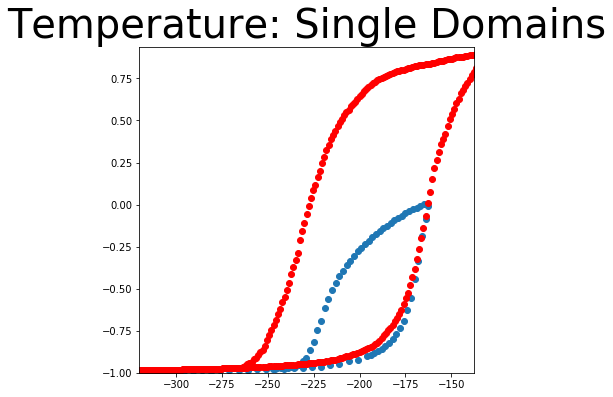

In [2112]:
%matplotlib inline
import matplotlib.pyplot as plt

norm=1.00

plt.figure(figsize=(6,6))

plt.title("Temperature: Single Domains",size=40)

#plt.scatter(np.array(h_inter)[:int(len(h_inter)*2/2.)],np.array(m_inter)[:int(len(h_inter)*2/2.)]/norm,color='r')
plt.scatter(hexp_on1,np.array(mexp_on1)*0.99999,label='Experimental')
plt.scatter(np.array(h_inter)-0,(4/4*np.array(m_inter))*1.00+0.00/norm+0.00,color='r')
#plt.scatter(-np.array(h_inter),-np.array(m_inter)/norm,color='b')

#plt.scatter(hexp_on,np.array(mexp_on)/0.99)

plt.xlim(-320,-137.5)
#plt.xlim(abs(hini/1.),abs(hfinal/1.))
plt.ylim(-1,0.939)
#plt.savefig('firstsimul_20x20_interdipol_3D.jpeg')
#plt.savefig('firstsimul_20x20_nointer_3D.jpeg')
##plt.savefig('firstsimul_10x10_nointer.jpeg')
#plt.savefig('firstsimul_12x12_nointer_3D.jpeg')
#plt.savefig('firstsimul_12x12_interdipol_3D.jpeg')

#plt.savefig('EB_withtemperature.jpg')
#plt.savefig('EB_notemperature.jpg')
#plt.savefig('EB_withinteraction.jpg')
#plt.savefig('EB_withinteractionandtemperature.jpg')
#plt.savefig('EB_withinteraction_dipolar.jpg')

#plt.savefig('polyEB_hardaxis_nointeraction.jpg')
#plt.savefig('polyEB_easyaxis_nointeraction.jpg')

#plt.savefig('polyEB_hardaxis_withinteraction.jpg')
#plt.savefig('polyEB_easyaxis_withinteraction.jpg')

#plt.savefig('polyEB_easyaxis_withtemperature.jpg')
#plt.savefig('polyEB_hardaxis_withtemperature.jpg')

#plt.savefig('polyEB_easyaxis_withinteraction_dipolar.jpg')
#plt.savefig('polyEB_hardaxis_withinteraction_dipolar.jpg')

#plt.savefig('polyEB_easyaxis_withinteraction_dmi.jpg')
#plt.savefig('polyEB_hardaxis_withinteraction_dmi.jpg')

#plt.savefig('polyEB_easyaxis_withinteraction_biquadexch.jpg')
#plt.savefig('polyEB_hardaxis_withinteraction_biquadexch.jpg')

plt.show()



In [2113]:
hpasso

0.6

In [2114]:
np.max(h_inter),np.min(m_inter)

(-51.19999999999865, -0.9886658691084553)

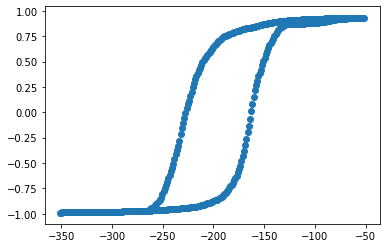

In [2115]:
import matplotlib.pyplot as plt
plt.scatter(h_inter,m_inter)


In [1628]:
field_temp,hini

(0.0, -350.0)

In [4185]:
hc1,hc2=None,None
for i in range(len(m_inter)):
#        if(m_inter[i]>0 and h_inter[i]>=0.0):
    if(m_inter[i]<0 and m_inter[i-1]>0):
        hc1=(h_inter[i-1]+h_inter[i])/2.
    if(m_inter[i]>0 and m_inter[i-1]<0):
        hc2=(h_inter[i-1]+h_inter[i])/2.
#            break
#    hc=h_inter[-1]
hc=(hc1-hc2)/2.
heb=(hc1+hc2)/2.
print(hc1,hc2)
print(hc,heb)

-276.1999999999996 -204.1999999999992
-36.0000000000002 -240.1999999999994


In [2437]:
import time
start=time.time()
from IPython.display import clear_output


#m_inter,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso)
divphi=1*18
phi_ini=1*pi/4.
phi_final=2/2.*pi+1*3.1415/4.
phi_step=(phi_final-phi_ini)/divphi
hphi=phi_ini+0.00*pi/180

list_hc=[]
list_eb=[]
for l in tnrange(divphi+1):
#for l in tnrange(5):
    m_inter,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,hphi)
    hc1,hc2=None,None
    for i in range(len(m_inter)):
#        if(m_inter[i]>0 and h_inter[i]>=0.0):
        if(m_inter[i]<0 and m_inter[i-1]>0):
            hc1=(h_inter[i-1]+h_inter[i])/2.
        if(m_inter[i]>0 and m_inter[i-1]<0):
            hc2=(h_inter[i-1]+h_inter[i])/2.
#            break
#    hc=h_inter[-1]
    hc=(hc1-hc2)/2.
    heb=(hc1+hc2)/2.
#    print(hphi,hc,heb)
    list_hc.append([hphi,hc])
    list_eb.append([hphi,heb])
    phi_ini+=phi_step
    hphi+=phi_step
    
    clear_output(wait=True)
    
    x_hc=[]
    y_hc=[]

    for i in range(len(list_hc)):
        x_hc.append(list_hc[i][0])
        y_hc.append(list_hc[i][1])    

    x_eb=[]
    y_eb=[]

    for i in range(len(list_eb)):
        x_eb.append(list_eb[i][0])
        y_eb.append(list_eb[i][1])    
    
#    plt.close()
    
    import matplotlib.pyplot as plt

    #plt.scatter(x_hc, abs(np.array(y_hc)), marker = 'x')
    plt.scatter(x_hc, np.array(y_hc), marker = 'x')
    plt.scatter(x_eb, np.array(y_eb), marker = 'v')
    plt.title("Coercive Field",size=28)
    #ax.scatter(x_hc, abs(np.array(y_hc)), marker = 'x')
    plt.xlim(-0/2*3.1415,4/2*3.1415+0.1)
    plt.show()
    
    plt.scatter(h_inter, m_inter, marker = 'x')
    plt.show()
    
list_hc=np.array(list_hc)
    
stop=time.time()
print(-start+stop)

/home/vagner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  from ipykernel import kernelapp as app


KeyboardInterrupt: 

In [ ]:
m_inter

In [ ]:
list_hc

In [ ]:
list_eb

In [ ]:
x_hc=[]
y_hc=[]

for i in range(len(list_hc)):
    x_hc.append(list_hc[i][0])
    y_hc.append(list_hc[i][1])    
    
x_eb=[]
y_eb=[]

for i in range(len(list_eb)):
    x_eb.append(list_eb[i][0])
    y_eb.append(list_eb[i][1])    
    
    

In [ ]:
import matplotlib.pyplot as plt

ax = plt.subplot(111, projection='polar')
ax.plot(x_hc, abs(np.array(y_hc)), marker = 'x')
#ax.scatter(x_hc, abs(np.array(y_hc)), marker = 'x')
ax.set_rmax(40)
ax.set_rmin(0)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

#plt.scatter(x_hc, abs(np.array(y_hc)), marker = 'x')
plt.scatter(x_hc, np.array(y_hc), marker = 'x')
plt.title("Coercive Field",size=28)
#ax.scatter(x_hc, abs(np.array(y_hc)), marker = 'x')
#plt.savefig("singledomain_temp.jpg")
plt.xlim(-0/2*3.1415,4/2*3.1415+0.1)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

ax = plt.subplot(111, projection='polar')
ax.plot(x_eb, abs(np.array(y_eb)), marker = 'x')
ax.set_rmax(20)
ax.set_rmin(0)
plt.show()



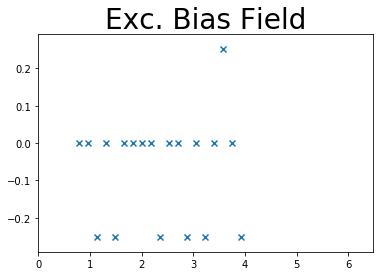

In [1156]:
import matplotlib.pyplot as plt

#plt.scatter(x_eb, abs(np.array(y_eb)), marker = 'x')
plt.scatter(x_eb, np.array(y_eb), marker = 'x')
#ax.scatter(x_hc, abs(np.array(y_hc)), marker = 'x')
plt.xlim(-0/2*3.1415,4/2*3.1415+0.2)
plt.title("Exc. Bias Field",size=28)
plt.show()

In [1388]:
# experimental data
path='/home/vagner/Desktop/galfenol/galhctheta.txt'
#path='/home/vagner/Desktop/galfenol/gal90deg.txt'
#path='/home/vagner/Desktop/galfenol/gal50deg.txt'
#path = '/home/vagner/Desktop/galfenol/gal0deg.txt'

hexp10ktube = open(path,'r')
hexp=hexp10ktube.readlines()

print(hexp[0])
#print(a1[0][1])

hc_on=[]
mexp_on=[]
hexp10ktube.close()
for i in range(len(hexp)):
    listexp=hexp[i].split('\t')
    hc_on.append(float(listexp[0]))
    mexp_on.append(float(listexp[1].split('\n')[0]))

theta_on=np.array(hc_on)
hc_on=np.array(mexp_on)



0	33.3



In [1389]:
theta_on=theta_on*3.1415/180.

In [1390]:
theta_on

array([0.        , 0.17452778, 0.34905556, 0.52358333, 0.69811111,
       0.87263889, 1.04716667, 1.22169444, 1.39622222, 1.57075   ,
       1.74527778, 1.91980556, 2.09433333, 2.26886111, 2.44338889,
       2.61791667, 2.79244444, 2.96697222, 3.1415    ])

In [1391]:
hc_on

array([33.3 , 31.03, 31.29, 31.74, 28.  , 27.73, 32.33, 20.81, 20.81,
       22.66, 20.97, 20.18, 29.93, 27.63, 27.44, 29.77, 30.04, 33.57,
       37.03])

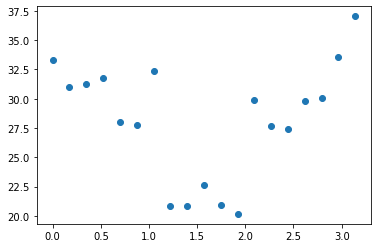

In [1392]:
import matplotlib.pyplot as plt
plt.scatter(theta_on,mexp_on)

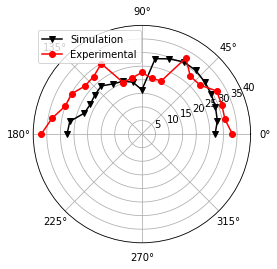

In [1163]:
import matplotlib.pyplot as plt

ax = plt.subplot(111, projection='polar')
l1=ax.plot(np.array(x_hc)-pi/4, 2.5*abs(np.array(y_hc)), marker = 'v',color='black',label='Simulation')
l2=ax.plot(theta_on, hc_on, marker = 'o',color='red',label='Experimental')

#l2=ax.plot(theta_on, mexp_on, marker = 'o',color='blue',label='Experimental')

ax.legend()
#plt.legend((l1,l2),('90 deg','50 deg'),fontsize=20)

ax.set_rmax(40)
ax.set_rmin(0)

# filme
#plt.savefig("polarplot_hc_cubic_moriyaquad.png")
#plt.savefig("polarplot_hc_cubic_dipolar.png")
#plt.savefig("polarplot_hc_cubic_exchange.png")
#plt.savefig("polarplot_hc_cubic_moriya.png")
#plt.savefig("polarplot_hc_cubic_moriyachiralmultispin.png")
#plt.savefig("polarplot_hc_cubic_exchangebiquad.png")

# nanomembrane!

#plt.savefig("polarplot_hc_cubic_moriyachiralmultispin_nmb.png")
#plt.savefig("polarplot_hc_cubic_dipolar_nmb.png")
#plt.savefig("polarplot_hc_cubic_dipolar_nmb_longer.png")

plt.show()

In [48]:
import time
start=time.time()
#m_inter,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso)
divphi=18
phi_ini=1*3.14515/4.
phi_final=1*3.1415+1*3.1415/4.
phi_step=(phi_final-phi_ini)/divphi
hphi=phi_ini

list_mrem=[]
list_mrem_eb=[]
for l in tnrange(divphi+1):
#for l in tnrange(1):
    m_inter,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,hphi)
#    mrem=m_inter[step-1]
    mrem_1=m_inter[int(len(m_inter)/4.)-1]
    mrem_2=m_inter[int(3*len(m_inter)/4.)-1]
    
    mrem_eb=(mrem_1+mrem_2)/2.
    mrem_c=(mrem_1-mrem_2)/2.
    
    print(mrem_c,mrem_eb)
    list_mrem.append([phi_ini,mrem_c])
    list_mrem_eb.append([phi_ini,mrem_eb])
    phi_ini+=phi_step
    hphi+=phi_step
    
    
list_mrem=np.array(list_mrem)
    
stop=time.time()
print(-start+stop)

/home/vagner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  if sys.path[0] == '':


0.9170147840981249 0.0005928336926360744
0.9713515024919224 0.00011915928681521804
0.9973562654311515 -5.494039636344539e-06
0.9955555507986342 0.001135809641221619
0.9689077175391938 0.00018712596747977317
0.9127440570874896 0.0004955383907436217
0.829322054773487 0.0008802702485221636
0.7200017165599399 0.0011867413261260618
0.587911767638114 0.0022117669274618335
0.565069844570109 0.03846894399761258
0.7102529037646581 0.030243178721096053
0.7771349054540304 0.027949503066798054
0.8632166868438838 0.02413622415067329
0.8821131059681531 0.027895947170597124
0.8898126669406365 0.013053836593164059
0.8698218134922948 0.02269754682474634
0.8236866336186541 0.011610848745430058
0.8343933346608752 0.0005686412726164103
0.9166876172077987 0.00041808992194686256

9832.60871386528


In [49]:
m_inter

array([0.9981783 , 0.9967849 , 0.99567397, ..., 0.98959515, 0.98964558,
       0.98970081])

In [50]:
list_mrem

array([[0.7862875 , 0.91701478],
       [0.96076458, 0.9713515 ],
       [1.13524167, 0.99735627],
       [1.30971875, 0.99555555],
       [1.48419583, 0.96890772],
       [1.65867292, 0.91274406],
       [1.83315   , 0.82932205],
       [2.00762708, 0.72000172],
       [2.18210417, 0.58791177],
       [2.35658125, 0.56506984],
       [2.53105833, 0.7102529 ],
       [2.70553542, 0.77713491],
       [2.8800125 , 0.86321669],
       [3.05448958, 0.88211311],
       [3.22896667, 0.88981267],
       [3.40344375, 0.86982181],
       [3.57792083, 0.82368663],
       [3.75239792, 0.83439333],
       [3.926875  , 0.91668762]])

In [51]:
x_rem=[]
y_rem=[]

for i in range(len(list_mrem)):
    x_rem.append(list_mrem[i][0])
    y_rem.append(list_mrem[i][1])    
    
x_rem_eb=[]
y_rem_eb=[]

for i in range(len(list_mrem_eb)):
    x_rem_eb.append(list_mrem_eb[i][0])
    y_rem_eb.append(list_mrem_eb[i][1])    
    

In [52]:
y_rem=abs(np.array(y_rem))

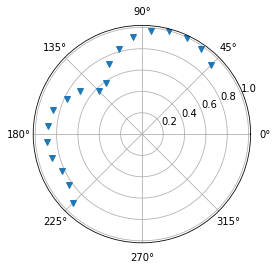

In [54]:
import matplotlib.pyplot as plt
plt.polar(x_rem,y_rem,'v')


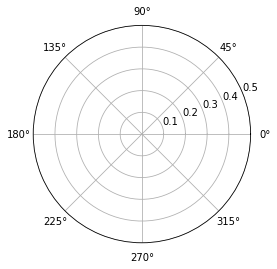

In [55]:
import matplotlib.pyplot as plt

ax = plt.subplot(111, projection='polar')
ax.plot(x_rem, abs(np.array(y_rem)), marker = 'x')
ax.set_rmax(0.5)
ax.set_rmin(0)
plt.show()

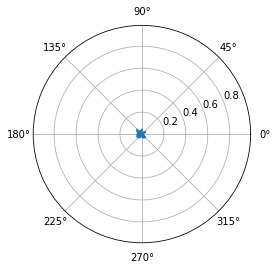

In [56]:
import matplotlib.pyplot as plt

ax = plt.subplot(111, projection='polar')
ax.plot(x_rem_eb, abs(np.array(y_rem_eb)), marker = 'x')
ax.set_rmax(0.99)
ax.set_rmin(0)
plt.show()

In [1382]:
# experimental data
path='/home/vagner/Desktop/galfenol/galmrtheta.txt'
#path='/home/vagner/Desktop/galfenol/gal90deg.txt'
#path='/home/vagner/Desktop/galfenol/gal50deg.txt'
#path = '/home/vagner/Desktop/galfenol/gal0deg.txt'

hexp10ktube = open(path,'r')
hexp=hexp10ktube.readlines()

print(hexp[0])
#print(a1[0][1])

theta_on=[]
mexp_on=[]
hexp10ktube.close()
for i in range(len(hexp)):
    listexp=hexp[i].split('\t')
    theta_on.append(float(listexp[0]))
    mexp_on.append(float(listexp[1].split('\n')[0]))





0	935



In [1383]:
mexp_on=np.array(mexp_on)/1050.

In [1384]:
theta_on=np.array(theta_on)/180.0*3.1415

In [1385]:
mexp_on

array([0.89047619, 0.93761905, 0.98533333, 0.98095238, 0.96914286,
       0.96346667, 0.95428571, 0.81571429, 0.78338095, 0.67871429,
       0.70964762, 0.76548571, 0.79199048, 0.85672381, 0.87092381,
       0.88038095, 0.86684762, 0.8426    , 0.82254286])

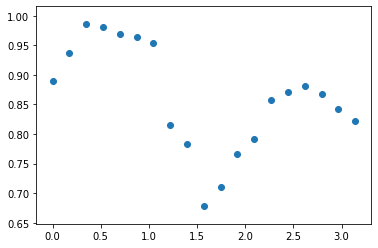

In [1387]:
import matplotlib.pyplot as plt
plt.scatter(theta_on,mexp_on)

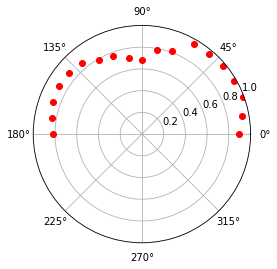

In [61]:
import matplotlib.pyplot as plt
plt.polar(theta_on,mexp_on,'ro')

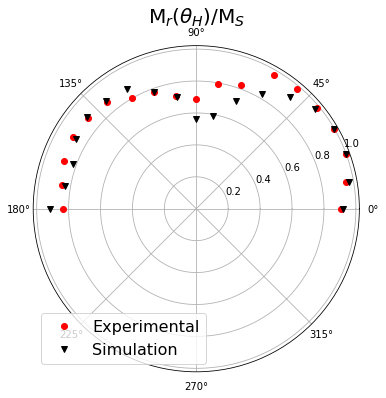

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
l1=plt.polar(theta_on,mexp_on/max(mexp_on),'ro',color='red',label='Experimental')
#plt.polar(theta_on,mexp_on/1,'ro')
l2=plt.polar(np.array(x_rem)-pi/4.,np.array(y_rem)*1,'ro', marker = 'v',color='black',label='Simulation')
plt.title('M$_r (\\theta_H)$/M$_S$',size=20)
plt.legend(fontsize=16,loc='best')
#plt.ylabel('Mr/M$_S$',rotation=90,size=28)
#plt.savefig('Mr_galfenol_polar.jpg',resolution=300)
plt.show()


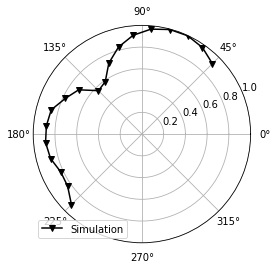

In [63]:
import matplotlib.pyplot as plt

ax = plt.subplot(111, projection='polar')
l1=ax.plot(x_rem, abs(np.array(y_rem)), marker = 'v',color='black',label='Simulation')
#l2=ax.plot(theta_on, mexp_on/1, marker = 'o',color='red',label='Experimental')

#l2=ax.plot(theta_on, mexp_on/max(mexp_on), marker = 'o',color='red',label='Experimental')

ax.legend()
#plt.legend((l1,l2),('90 deg','50 deg'),fontsize=20)

ax.set_rmax(1.0)
ax.set_rmin(0)

# filme
#plt.savefig("polarplot_mr_intermoriyaquadratic")
#plt.savefig("polarplot_mr_interdipolar")
#plt.savefig("polarplot_mr_interexchange")
#plt.savefig("polarplot_mr_intermoriya")
#plt.savefig("polarplot_mr_intermoriyamultichiralspin")
#plt.savefig("polarplot_mr_interexchangebiquad")

# nanomembrane!
#plt.savefig("polarplot_mr_intermoriyamultichiralspin_nmb")
#plt.savefig("polarplot_mr_interdipolar_nmb")
#plt.savefig("polarplot_mr_interdipolar_nmb_longer")


plt.show()

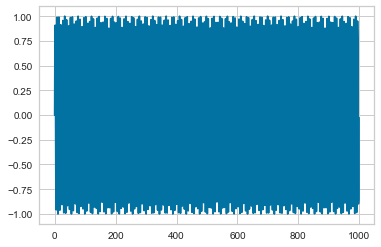

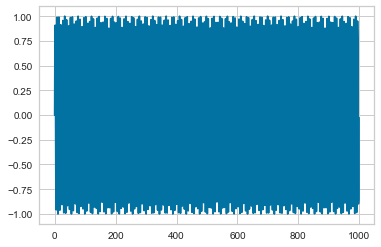

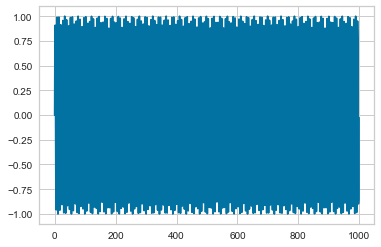

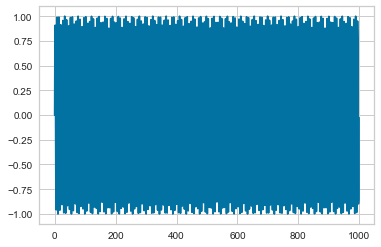

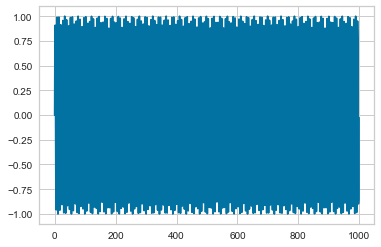

In [433]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1000)
y = np.sin(x)

for i in range(5):
    %matplotlib inline
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, y)
    plt.show
    plt.pause(5)
#    plt.close(fig)

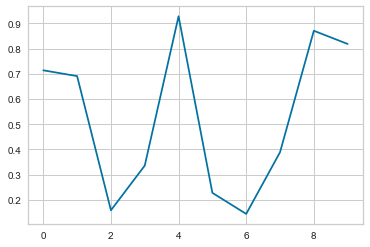

<Figure size 432x288 with 0 Axes>

In [435]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

plt.ion()
for i in range(50):
    clear_output(wait=True)
    y = np.random.random([10,1])
    plt.plot(y)
    plt.draw()
    plt.pause(0.01)
    plt.clf()

In [505]:
m_inter_0,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,0/1*pi/180.)
m_inter_45,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,45/1*pi/180.)
m_inter_90,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,90/1*pi/180.)

In [506]:
m_inter_20,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,20/1*pi/180.)
m_inter_70,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,70/1*pi/180.)


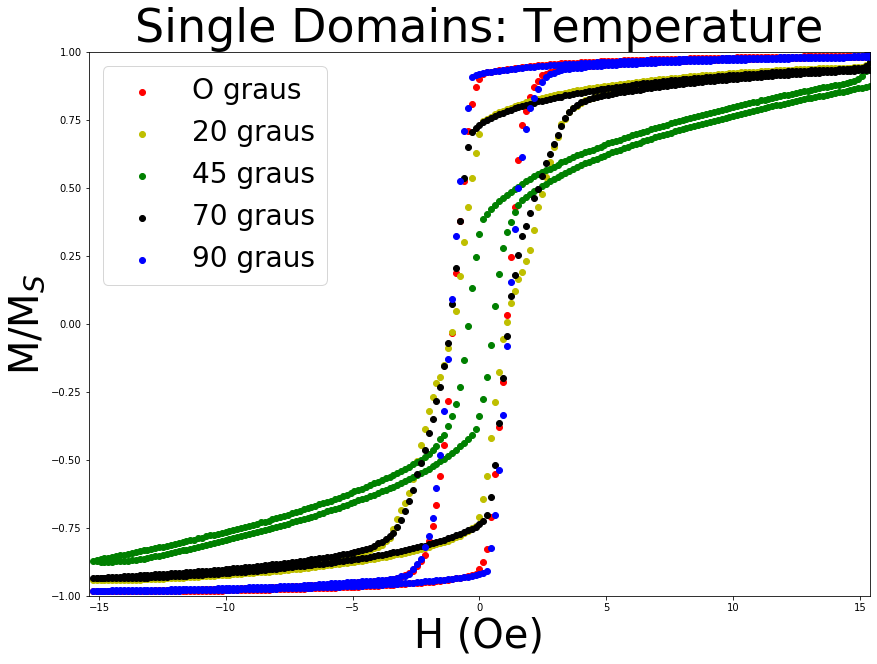

In [507]:
%matplotlib inline
import matplotlib.pyplot as plt

norm=1.00

plt.figure(figsize=(14,10))

plt.title("Single Domains: Temperature",size=46)

#plt.scatter(np.array(h_inter)[:int(len(h_inter)*2/2.)],np.array(m_inter)[:int(len(h_inter)*2/2.)]/norm,color='r')
plt.scatter(np.array(h_inter),(4/4*np.array(m_inter_0))/1./norm,color='r',label='O graus')
plt.scatter(np.array(h_inter),(4/4*np.array(m_inter_20))/1./norm,color='y',label='20 graus')
plt.scatter(np.array(h_inter),(4/4*np.array(m_inter_45))/1./norm,color='g',label='45 graus')
plt.scatter(np.array(h_inter),(4/4*np.array(m_inter_70))/1./norm,color='black',label='70 graus')
plt.scatter(np.array(h_inter),(4/4*np.array(m_inter_90))/1./norm,color='b', label='90 graus')
#plt.scatter(-np.array(h_inter),-np.array(m_inter)/norm,color='b')

plt.legend(fontsize=28)

#plt.scatter(hexp_on,np.array(mexp_on)/0.99)

#plt.xlim(-1600*3*3,1600*3*3)
plt.xlim(-abs(hini/1.),abs(hini/1.))
plt.ylim(-1,1)
plt.xlabel('H (Oe)',size=40)
plt.ylabel('M/M$_S$',size=40)
#plt.savefig('firstsimul_20x20_interdipol_3D.jpeg')
#plt.savefig('firstsimul_20x20_nointer_3D.jpeg')
##plt.savefig('firstsimul_10x10_nointer.jpeg')
#plt.savefig('firstsimul_12x12_nointer_3D.jpeg')
#plt.savefig('firstsimul_12x12_interdipol_3D.jpeg')
#plt.savefig('singledomains_withtemperature.jpg',resolution=300)
#plt.savefig('singledomains_notemperature.jpg',resolution=300)

#plt.savefig('singledomains_withtemperature_biaxial.jpg',resolution=300)
#plt.savefig('singledomains_notemperature_biaxial.jpg',resolution=300)


plt.show()



In [1119]:
m_inter_0,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,0/1*pi/180.+45/1*pi/180.)


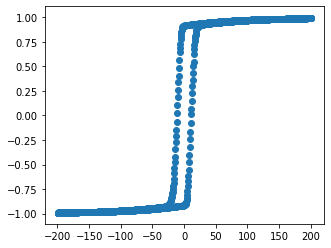

In [1120]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5,4])
plt.scatter(h_inter,m_inter_0)
plt.show()

In [1121]:
m_inter_45,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,45/1*pi/180.+45/1*pi/180.)


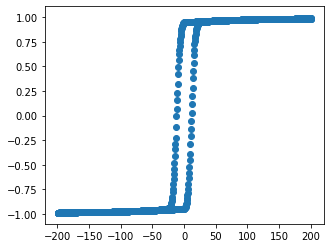

In [1122]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5,4])
plt.scatter(h_inter,m_inter_45)
plt.show()

In [1123]:
m_inter_90,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,90/1*pi/180.+45/1*pi/180.)

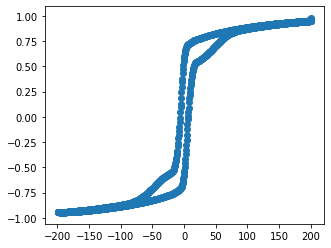

In [1124]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5,4])
plt.scatter(h_inter,m_inter_90)
plt.show()

In [1125]:
m_inter_140,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,140/1*pi/180.+45/1*pi/180.)

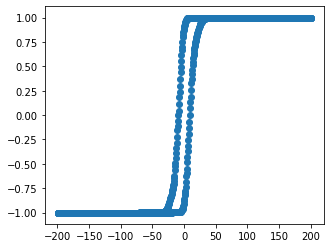

In [1126]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5,4])
plt.scatter(h_inter,m_inter_140)
plt.show()

In [1127]:
# experimental data
path1='/home/vagner/Desktop/galfenol/gal90deg.txt'
path2='/home/vagner/Desktop/galfenol/gal50deg.txt'
path3 = '/home/vagner/Desktop/galfenol/gal0deg.txt'
path4 = 'gal140deg.txt'

hexp10ktube = open(path1,'r')
hexp=hexp10ktube.readlines()


hexp_on1=[]
mexp_on1=[]
hexp10ktube.close()
for i in range(len(hexp)):
    listexp=hexp[i].split('\t')
    hexp_on1.append(float(listexp[0]))
    mexp_on1.append(float(listexp[1].split('\n')[0]))

hexp10ktube = open(path2,'r')
hexp=hexp10ktube.readlines()


hexp_on2=[]
mexp_on2=[]
hexp10ktube.close()
for i in range(len(hexp)):
    listexp=hexp[i].split('\t')
    hexp_on2.append(float(listexp[0]))
    mexp_on2.append(float(listexp[1].split('\n')[0]))
        
    
hexp10ktube = open(path3,'r')
hexp=hexp10ktube.readlines()


hexp_on3=[]
mexp_on3=[]
hexp10ktube.close()
for i in range(len(hexp)):
    listexp=hexp[i].split('\t')
    hexp_on3.append(float(listexp[0]))
    mexp_on3.append(float(listexp[1].split('\n')[0]))

hexp10ktube = open(path4,'r')
hexp=hexp10ktube.readlines()

hexp_on4=[]
mexp_on4=[]
hexp10ktube.close()
for i in range(len(hexp)):
    listexp=hexp[i].split('\t')
    hexp_on4.append(float(listexp[0]))
    mexp_on4.append(float(listexp[1].split('\n')[0]))
            

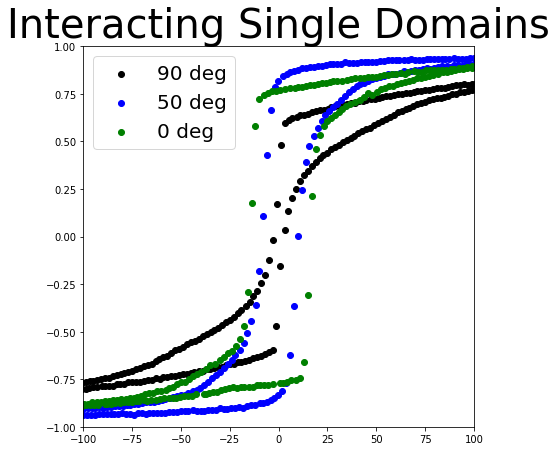

In [1128]:
import matplotlib.pyplot as plt

norm=1.00

plt.figure(figsize=(7,7))

plt.title("Interacting Single Domains",size=40)

l1=plt.scatter(hexp_on1,np.array(mexp_on1),color='black',label='90 deg')
l2=plt.scatter(hexp_on2,np.array(mexp_on2),color='blue',label='50 deg')
l3=plt.scatter(hexp_on3,np.array(mexp_on3),color='green',label='0 deg')

plt.legend((l1,l2,l3),('90 deg','50 deg','0 deg'),fontsize=20)

#plt.xlim(-1600*3*3,1600*3*3)
#plt.xlim(-abs(hini/1.),abs(hini/1.))
plt.xlim(-100,100)
plt.ylim(-1,1)
#plt.savefig('firstsimul_20x20_interdipol_3D.jpeg')
#plt.savefig('firstsimul_20x20_nointer_3D.jpeg')
##plt.savefig('firstsimul_10x10_nointer.jpeg')
#plt.savefig('firstsimul_12x12_nointer_3D.jpeg')
#plt.savefig('firstsimul_12x12_interdipol_3D.jpeg')

plt.show()




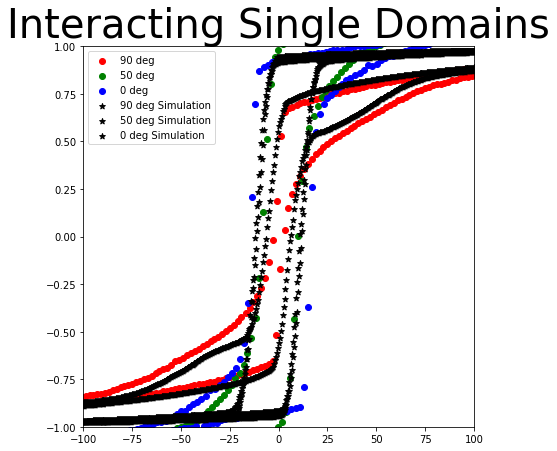

In [1129]:
import matplotlib.pyplot as plt

norm=1.00

plt.figure(figsize=(7,7))

plt.title("Interacting Single Domains",size=40)

l1=plt.scatter(hexp_on1,np.array(mexp_on1)*1.1,color='r',label='90 deg')
l2=plt.scatter(hexp_on2,np.array(mexp_on2)*1.2,color='g',label='50 deg')
l3=plt.scatter(hexp_on3,np.array(mexp_on3)*1.2,color='b',label='0 deg')

s1=plt.scatter(np.array(h_inter),(4/4*np.array(m_inter_0))/1./norm,color='black',label='O graus simulation',marker='*')
s2=plt.scatter(np.array(h_inter),(4/4*np.array(m_inter_45))/1./norm,color='black',label='45 graus simulation',marker='*')
s3=plt.scatter(np.array(h_inter),(4/4*np.array(m_inter_90))/1./norm,color='black', label='90 graus simulation',marker='*')

plt.legend((l1,l2,l3,s1,s2,s3),('90 deg','50 deg','0 deg','90 deg Simulation','50 deg Simulation','0 deg Simulation'),fontsize=10)

#plt.xlim(-1600*3*3,1600*3*3)
#plt.xlim(-abs(hini/1.),abs(hini/1.))
plt.xlim(-100,100)
plt.ylim(-1,1)
#plt.savefig('firstsimul_20x20_interdipol_3D.jpeg')
#plt.savefig('firstsimul_20x20_nointer_3D.jpeg')
##plt.savefig('firstsimul_10x10_nointer.jpeg')
#plt.savefig('firstsimul_12x12_nointer_3D.jpeg')
#plt.savefig('firstsimul_12x12_interdipol_3D.jpeg')

plt.show()




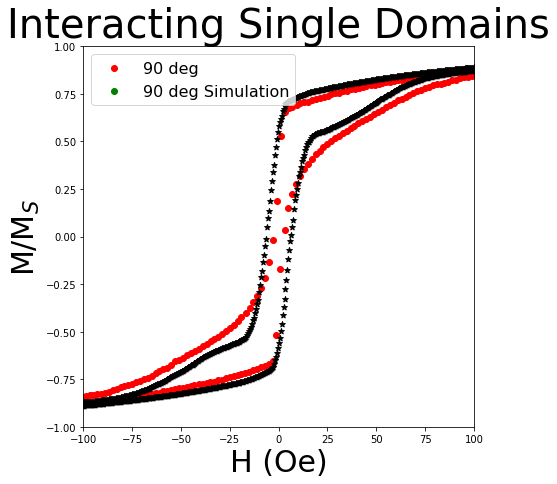

In [1136]:
import matplotlib.pyplot as plt

norm=1.00

plt.figure(figsize=(7,7))

plt.title("Interacting Single Domains",size=40)

l1=plt.scatter(hexp_on1,np.array(mexp_on1)*1.1,color='r',label='90 deg')

s1=plt.scatter(np.array(h_inter),(4/4*np.array(m_inter_90))/1./norm,color='black',label='O graus simulation',marker='*')

plt.legend((l1,l2,l3,s1,s2,s3),('90 deg','90 deg Simulation'),fontsize=16)

plt.xlabel("H (Oe)",size=30)
plt.ylabel("M/M$_S$",size=30)

#plt.xlim(-1600*3*3,1600*3*3)
#plt.xlim(-abs(hini/1.),abs(hini/1.))
plt.xlim(-100,100)
plt.ylim(-1,1)
#plt.savefig('firstsimul_20x20_interdipol_3D.jpeg')
#plt.savefig('firstsimul_20x20_nointer_3D.jpeg')
##plt.savefig('firstsimul_10x10_nointer.jpeg')
#plt.savefig('firstsimul_12x12_nointer_3D.jpeg')
#plt.savefig('firstsimul_12x12_interdipol_3D.jpeg')

#plt.savefig('galfenol_90deg.jpg')

plt.show()




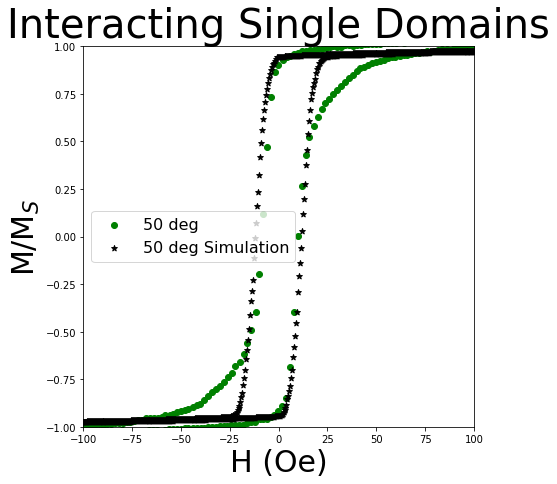

In [1138]:
import matplotlib.pyplot as plt

norm=1.00

plt.figure(figsize=(7,7))

plt.title("Interacting Single Domains",size=40)

l2=plt.scatter(hexp_on2,np.array(mexp_on2)*1.1,color='g',label='50 deg')

s2=plt.scatter(np.array(h_inter),(4/4*np.array(m_inter_45))/1./norm,color='black',label='45 graus simulation',marker='*')

plt.legend((l2,s2),('50 deg','50 deg Simulation'),fontsize=16)

plt.xlabel("H (Oe)",size=30)
plt.ylabel("M/M$_S$",size=30)

#plt.xlim(-1600*3*3,1600*3*3)
#plt.xlim(-abs(hini/1.),abs(hini/1.))
plt.xlim(-100,100)
plt.ylim(-1,1)
#plt.savefig('firstsimul_20x20_interdipol_3D.jpeg')
#plt.savefig('firstsimul_20x20_nointer_3D.jpeg')
##plt.savefig('firstsimul_10x10_nointer.jpeg')
#plt.savefig('firstsimul_12x12_nointer_3D.jpeg')
#plt.savefig('firstsimul_12x12_interdipol_3D.jpeg')

#plt.savefig('galfenol_45deg.jpg')

plt.show()




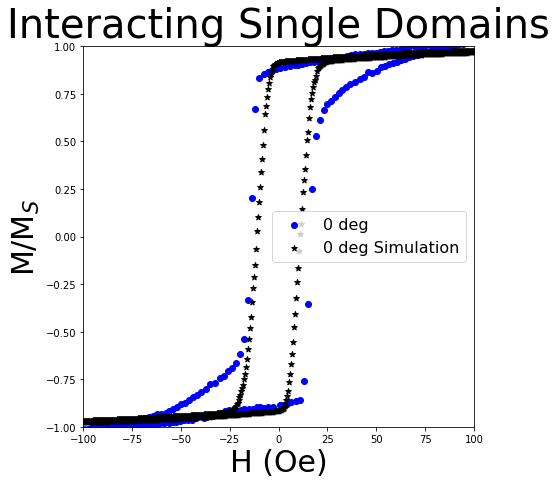

In [1141]:
import matplotlib.pyplot as plt

norm=1.00

plt.figure(figsize=(7,7))

plt.title("Interacting Single Domains",size=40)

l3=plt.scatter(hexp_on3,np.array(mexp_on3)*1.15,color='b',label='0 deg')

s3=plt.scatter(np.array(h_inter),(4/4*np.array(m_inter_0))/1./norm,color='black', label='90 graus simulation',marker='*')

plt.legend((l3,s3),('0 deg','0 deg Simulation'),fontsize=16)

plt.xlabel("H (Oe)",size=30)
plt.ylabel("M/M$_S$",size=30)


#plt.xlim(-1600*3*3,1600*3*3)
#plt.xlim(-abs(hini/1.),abs(hini/1.))
plt.xlim(-100,100)
plt.ylim(-1,1)
#plt.savefig('firstsimul_20x20_interdipol_3D.jpeg')
#plt.savefig('firstsimul_20x20_nointer_3D.jpeg')
##plt.savefig('firstsimul_10x10_nointer.jpeg')
#plt.savefig('firstsimul_12x12_nointer_3D.jpeg')
#plt.savefig('firstsimul_12x12_interdipol_3D.jpeg')

#plt.savefig('galfenol_0deg.jpg')


plt.show()




NameError: name 'hexp_on4' is not defined

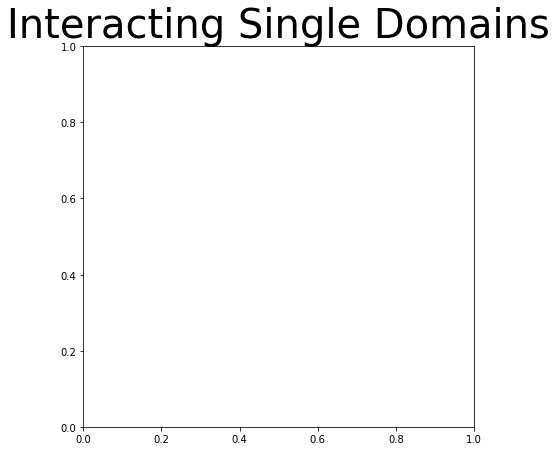

In [2586]:
import matplotlib.pyplot as plt

norm=1.00

plt.figure(figsize=(7,7))

plt.title("Interacting Single Domains",size=40)

l4=plt.scatter(hexp_on4,np.array(mexp_on4)*1.2,color='b',label='0 deg')

s4=plt.scatter(np.array(h_inter),(4/4*np.array(m_inter_140))/1./norm,color='black', label='90 graus simulation',marker='*')

plt.legend((l4,s4),('140 deg','140 deg Simulation'),fontsize=16)

plt.xlabel("H (Oe)",size=30)
plt.ylabel("M/M$_S$",size=30)


#plt.xlim(-1600*3*3,1600*3*3)
#plt.xlim(-abs(hini/1.),abs(hini/1.))
plt.xlim(-100,100)
plt.ylim(-1,1)
#plt.savefig('firstsimul_20x20_interdipol_3D.jpeg')
#plt.savefig('firstsimul_20x20_nointer_3D.jpeg')
##plt.savefig('firstsimul_10x10_nointer.jpeg')
#plt.savefig('firstsimul_12x12_nointer_3D.jpeg')
#plt.savefig('firstsimul_12x12_interdipol_3D.jpeg')

#plt.savefig('galfenol_140deg.jpg')

plt.show()




In [1409]:
Kf2_bi/Kf1_bi

-1.0

In [1411]:
Kf1_gal

2000.0

In [2116]:
# experimental data
path1='/home/vagner/Documents/PosDoc/geshev/PDJ2020/working/thermaldrift/majorloop.txt'

# for 792 h

path1='/home/vagner/Documents/PosDoc/geshev/PDJ2020/working/thermaldrift/major-792h.dat'

hexp10ktube = open(path1,'r')
hexp=hexp10ktube.readlines()


hexp_on1=[]
mexp_on1=[]
hexp10ktube.close()
for i in range(len(hexp)):
    listexp=hexp[i].split('\t')
    hexp_on1.append(float(listexp[0]))
    mexp_on1.append(float(listexp[1].split('\n')[0]))


In [2117]:
#hexp_on1
#mexp_on1

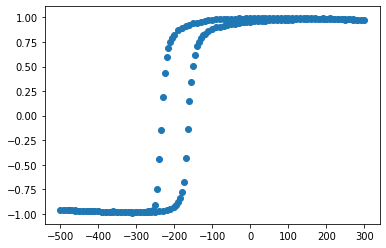

In [2118]:
import matplotlib.pyplot as plt

plt.scatter(hexp_on1,mexp_on1)

In [1393]:
m_inter,h_inter,h_test,hnowlist = hysteresis_inter(NN2,Msat,hpasso,90/1*pi/180.)

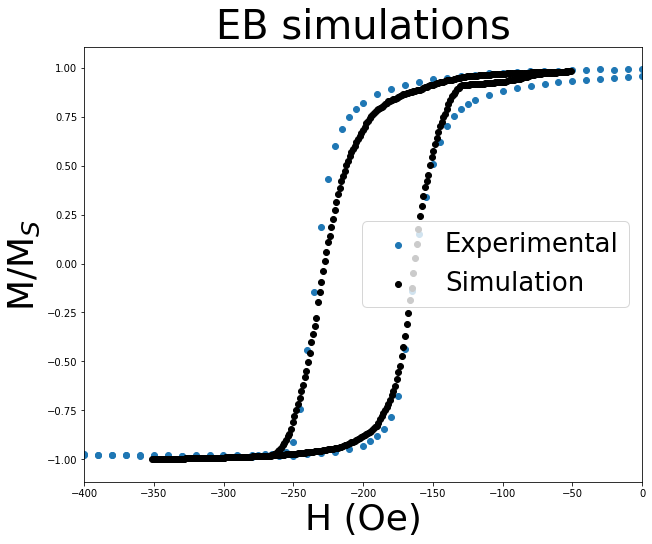

In [2120]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,8])
plt.scatter(hexp_on1,np.array(mexp_on1)*1.00,label='Experimental')
plt.scatter(np.array(h_inter)+40*0,m_inter*1.03+0.02,color='black',label='Simulation')
plt.title('EB simulations',size=40)
plt.xlabel('H (Oe)',size=36)
plt.ylabel('M/M$_{S}$',size=36)
plt.legend(fontsize=26)
plt.xlim(-400,0)

#plt.savefig('CoIrMn_major_withinteraction.jpg')

#plt.savefig('CoIrMn_major_nointeraction.jpg')

#plt.savefig('792h_CoIrMn_major_nointeraction.jpg')

plt.show()

In [2087]:
# experimental data
# descendente!
path1='/home/vagner/Documents/PosDoc/geshev/PDJ2020/working/thermaldrift/recoil.txt'
path1='/home/vagner/Documents/PosDoc/geshev/PDJ2020/working/thermaldrift/recoil-792h-Hc-dsc.dat'

# ascendente

#path1='/home/vagner/Documents/PosDoc/geshev/PDJ2020/working/thermaldrift/recoil-0h-Hc-asc.dat'
# 792 h
path1='/home/vagner/Documents/PosDoc/geshev/PDJ2020/working/thermaldrift/recoil-792h-Hc-asc.dat'


hexp10ktube = open(path1,'r')
hexp=hexp10ktube.readlines()


hexp_on1=[]
mexp_on1=[]
hexp10ktube.close()
for i in range(len(hexp)):
    listexp=hexp[i].split('\t')
    hexp_on1.append(float(listexp[0]))
    mexp_on1.append(float(listexp[1].split('\n')[0]))


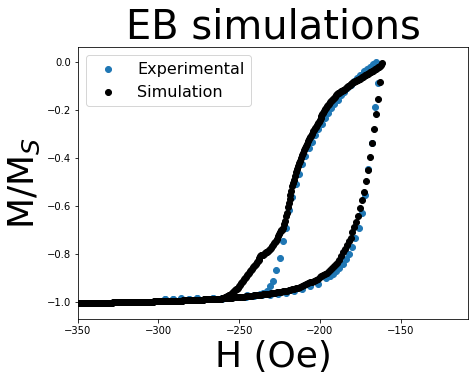

In [2105]:
import matplotlib.pyplot as plt

plt.figure(figsize=[7,5])
plt.scatter(hexp_on1,np.array(mexp_on1)*0.9999,label='Experimental')
plt.scatter(np.array(h_inter)+1,np.array(m_inter)*1.00-0.015,color='black',label='Simulation')
plt.title('EB simulations',size=40)
plt.xlabel('H (Oe)',size=36)
plt.ylabel('M/M$_{S}$',size=36)
plt.legend(fontsize=16)
plt.xlim(-350,-108)

#plt.savefig('CoIrMn_recoil_withinteraction.jpg')
#plt.savefig('CoIrMn_recoil_ascending_withinteraction.jpg')

#plt.savefig('CoIrMn_recoil_withinteraction_new.jpg')
#plt.savefig('CoIrMn_recoil_ascending_withinteraction_new.jpg')


#plt.savefig('CoIrMn_recoil_withinteraction_dipolar_new.jpg')
#plt.savefig('CoIrMn_recoil_ascending_withinteraction_new.jpg')

#plt.savefig('CoIrMn_recoil_nointeraction_new.jpg')
#plt.savefig('CoIrMn_recoil_ascending_nointeraction_new.jpg')

#plt.savefig('792h_CoIrMn_recoil_nointeraction_new.jpg')
#plt.savefig('792h_CoIrMn_recoil_ascending_nointeraction_new.jpg')


plt.show()

In [1685]:
# experimental data
path1='/home/vagner/Documents/PosDoc/geshev/PDJ2020/working/thermaldrift/thermaldrift.txt'

hexp10ktube = open(path1,'r')
hexp=hexp10ktube.readlines()


texp_on1=[]
hebexp_on1=[]
hexp10ktube.close()
for i in range(len(hexp)):
    listexp=hexp[i].split('\t')
    texp_on1.append(float(listexp[0]))
    hebexp_on1.append(float(listexp[1].split('\n')[0]))


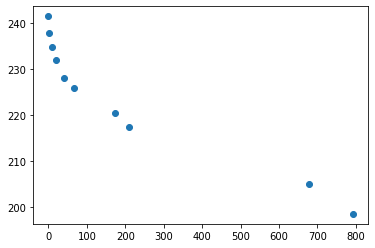

In [1686]:
import matplotlib.pyplot as plt

plt.scatter(texp_on1,hebexp_on1)


In [1687]:
teb_simul =[10*time for time in range(1,80)]

In [1688]:
teb_simul

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790]

In [1757]:
#heb_simul=[305-6.71*np.log(0.8*time*3600) for time in teb_simul]
heb_simul=[1.0*(310-1.0*6.81*np.log(1.0*time*3600)) for time in teb_simul]

print(" O coeficiente h é igual a: {0}".format(-310/hebexp_on1[0]))
print(" O coeficiente $\Delta$h é igual a: {0}".format(-6.81/hebexp_on1[0]))


 O coeficiente h é igual a: -1.2836438923395446
 O coeficiente $\Delta$h é igual a: -0.028198757763975155


In [1758]:
heb_julian= [np.exp(5.475-0.0063*(time)**(1/2.)) for time in teb_simul]

In [1759]:
#heb_simul

In [1760]:
print(0.98/1.25)

0.784


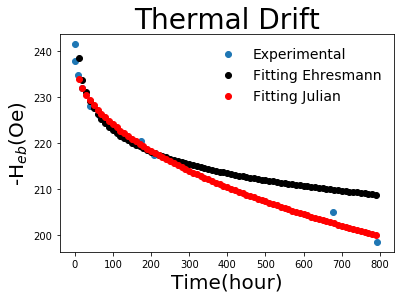

In [1761]:
import matplotlib.pyplot as plt
plt.scatter(texp_on1,hebexp_on1,label='Experimental')
plt.scatter(teb_simul,heb_simul,color='black',label='Fitting Ehresmann')
plt.scatter(teb_simul,heb_julian,color='red',label='Fitting Julian')
plt.legend(fontsize=14,frameon=False)
plt.title('Thermal Drift',size=28)
plt.xlabel('Time(hour)',size=20)
plt.ylabel('-H$_{eb}$(Oe)',size=20)
#plt.savefig('Thermaldrift_firstsimul.jpg',resolution=300)
plt.show()

In [1762]:
310/hebexp_on1[0]

1.2836438923395446